In [1]:
pwd


'C:\\Users\\13154'

In [2]:
#IMPORTING SOME NECESSARY LIBRARIES

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     

In [3]:
#THIS WILL BE OUR USER DEMOGRAPHIC DATA

df_user = pd.read_csv("user_info.csv") 


In [4]:
# WE HAVE AROUND 1000 ROWS AND 25 COLUMNS

df_user.shape 

(1000, 25)

In [5]:
df_user.head() # LETS CHECK HOW IT LOOKS

,user_id,favorite_pizza_topping,favorite_ice_cream_flavor,apm,income,grade,height,reaction_time,city,age,...,9,4,13,14,0,11,6,3,12,7
0,78389,Pineapple,Red Velvet,154,100,Z,176,353,A-town,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79235,Ham,Red Velvet,193,95,Y,182,250,C-borough,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78816,Pineapple,NaN,180,97,Z,177,311,A-town,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78961,Black olives,Peach,168,99,Z,184,320,A-town,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78427,Red peppers,Red Velvet,207,105,X,999,329,A-town,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# STAGE 1: DATA CLEANING AND PREPARATION

## Can see some Unnecessary Columns, ex: 9,4,13 etc.. removing them is recommended

In [6]:
columns_drop = list(df_user.columns.values) 

In [7]:
columns_drop = columns_drop[-10:] # LETS DROP ALL THE COLUMNS (10 COLUMNS FROM LAST)

In [8]:
columns_drop

['9', '4', '13', '14', '0', '11', '6', '3', '12', '7']

In [9]:
df_user.drop(columns_drop, axis = 1, inplace = True) # dROPPED

In [10]:
df_user.head()

,user_id,favorite_pizza_topping,favorite_ice_cream_flavor,apm,income,grade,height,reaction_time,city,age,company,kappa_ability,weight,amount,gregariousness
0,78389,Pineapple,Red Velvet,154,100,Z,176,353,A-town,47,Pause Associates,6291,149,10,48
1,79235,Ham,Red Velvet,193,95,Y,182,250,C-borough,20,Go LLC,4765,-234,19,62
2,78816,Pineapple,NaN,180,97,Z,177,311,A-town,67,Pause Associates,4360,145,41,57
3,78961,Black olives,Peach,168,99,Z,184,320,A-town,48,Pause Associates,3663,148,105,43
4,78427,Red peppers,Red Velvet,207,105,X,999,329,A-town,35,Pause Associates,149,146,53,58


In [11]:
# THIS WILL BE OUR CHURN DATA OR THE TARGET

df_churn = pd.read_csv("churn.csv") 

In [12]:
# lETS SORT IT BASED ON THE USER_ID TO MAKE IT COMPATIBLE FOR MERGING WITH OTHER TABLES

df_churn.sort_values('user_id',inplace=True) 

In [13]:
df_churn.head(10)

,user_id,churn
555,78268,no
624,78269,no
802,78270,yes
551,78271,no
275,78272,no
263,78273,no
382,78274,yes
950,78275,yes
236,78276,yes
331,78277,no


### In future we might merge data from different table It is better to sort the table based on User_ID

In [14]:
df_user.sort_values(by = ['user_id'], inplace = True)
df_user.shape

(1000, 15)

In [15]:
# USER_ID WILL BE OUR INDEX WHICH IS GOOD FOR REFERENCE

df_user.set_index('user_id',inplace=True) 
df_user.head()

,favorite_pizza_topping,favorite_ice_cream_flavor,apm,income,grade,height,reaction_time,city,age,company,kappa_ability,weight,amount,gregariousness
user_id,,,,,,,,,,,,,,
78268,Spinach,Mint,171,104,X,177,295,C-borough,52,Pause Associates,3363,144,19,57
78269,Oregano,Pistachio,218,96,Y,178,305,C-borough,33,Pause Associates,1720,147,57,48
78270,NaN,NaN,175,114,X,178,318,A-town,37,Pause Associates,141,152,19,58
78271,Red peppers,Coffee,184,101,Z,185,295,A-town,44,Pause Associates,920,153,79,52
78272,Chicken,Coffee,210,100,Z,180,311,A-town,34,Go LLC,1453,154,29,56


In [16]:
#LETS PLACE CHURN IN THE USER DATA FOR EXPLORATORY ANALYSIS AND CORRELATION DETECTION

df_user["churn"] = df_churn["churn"].values 

In [17]:
df_user.head(10)

,favorite_pizza_topping,favorite_ice_cream_flavor,apm,income,grade,height,reaction_time,city,age,company,kappa_ability,weight,amount,gregariousness,churn
user_id,,,,,,,,,,,,,,,
78268,Spinach,Mint,171,104,X,177,295,C-borough,52,Pause Associates,3363,144,19,57,no
78269,Oregano,Pistachio,218,96,Y,178,305,C-borough,33,Pause Associates,1720,147,57,48,no
78270,NaN,NaN,175,114,X,178,318,A-town,37,Pause Associates,141,152,19,58,yes
78271,Red peppers,Coffee,184,101,Z,185,295,A-town,44,Pause Associates,920,153,79,52,no
78272,Chicken,Coffee,210,100,Z,180,311,A-town,34,Go LLC,1453,154,29,56,no
78273,Sausage,Cookies and Cream,250,94,Y,175,314,B-ville,49,NaN,1563,154,2,51,no
78274,Tomato,Mint,223,111,Y,181,287,B-ville,41,Go LLC,2219,159,2,47,yes
78275,Spinach,Cookies and Cream,168,114,Y,173,277,A-town,55,Pause Associates,1788,162,130,45,yes
78276,Sausage,NaN,164,113,X,178,319,C-borough,60,Pause Associates,1715,162,16,52,yes


### Lets Check for Missing Values and Fill or Drop based on their Importance

In [18]:
df_user.isnull().sum()

favorite_pizza_topping       43
favorite_ice_cream_flavor    55
apm                           0
income                        0
grade                        46
height                        0
reaction_time                 0
city                         48
age                           0
company                      63
kappa_ability                 0
weight                        0
amount                        0
gregariousness                0
churn                         0
dtype: int64

## We can see that categorical data have many missing values, so filling a categorical data is a bit risky as we cannot fill a user preference or company by popular values in their respective column

In [19]:
df_user.isnull().sum().sum() # ALSO DROPPING THEM WOULD BE RISKY AS WE WILL LOSE 255 ROWS

255

In [20]:
# TOP 5 PREFERENCES of categorical data ARE AS BELOW

df_user['favorite_pizza_topping'].value_counts()[:6] 

Pineapple       115
Extra cheese    101
Ham              96
Red peppers      83
Sausage          83
Spinach          66
Name: favorite_pizza_topping, dtype: int64

In [21]:
df_user['favorite_ice_cream_flavor'].value_counts()[:6]

Vanilla              123
Red Velvet           113
Cookies and Cream    100
Orange Sherbert       98
Cheesecake            86
Strawberry            70
Name: favorite_ice_cream_flavor, dtype: int64

In [22]:
df_user['grade'].value_counts()[:6]

Z    452
Y    399
X    103
Name: grade, dtype: int64

In [23]:
df_user['city'].value_counts()[:6] # This seems like fillable but its still not recommended

A-town       538
C-borough    327
B-ville       87
Name: city, dtype: int64

In [24]:
df_user['company'].value_counts()[:6]

Pause Associates    538
Go LLC              362
Stop Inc             37
Name: company, dtype: int64

## It is not recommended to fill in with popular items, hence I will drop all NA values and go ahead,
## if it  really affects my model then I would try something like filling with random values.
## That procedure is commented below

In [25]:
# df_randomfill = df_user.copy(deep=True)
# missingcol = ['favorite_pizza_topping', 'favorite_ice_cream_flavor', 'grade', 'city', 'company']

In [26]:
# for field in missingcol:
#     permutation = np.random.permutation(df_randomfill[field])

# #erase the empty values
#     empty_is = np.where(permutation == "")
#     permutation = np.delete(permutation, empty_is)

# #replace all empty values of the dataframe[field]
#     end = len(permutation)
#     df_randomfill[field] = df_randomfill[field].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

In [27]:
# df_randomfill.isnull().sum()

## For Brute force analysis lets drop NA values

In [28]:
df_user.dropna(inplace=True)
df_user.shape # We Have reduce 230 rows

(770, 15)

In [29]:
df_user.dtypes #Just to check whether all the column have a proper data types

favorite_pizza_topping       object
favorite_ice_cream_flavor    object
apm                           int64
income                        int64
grade                        object
height                        int64
reaction_time                 int64
city                         object
age                           int64
company                      object
kappa_ability                 int64
weight                        int64
amount                        int64
gregariousness                int64
churn                        object
dtype: object

In [30]:
df_user.describe().transpose() # Some statistical and Distribution highlights of nuerical Data

,count,mean,std,min,25%,50%,75%,max
apm,770.0,192.241558,28.385720,110.0,172.00,192.0,211.00,276.0
income,770.0,102.706494,6.140283,89.0,98.00,102.0,107.00,122.0
height,770.0,190.018182,101.933874,165.0,175.00,177.0,180.00,999.0
reaction_time,770.0,304.331169,32.468381,207.0,283.25,304.0,326.00,423.0
age,770.0,43.725974,14.219036,18.0,32.00,43.0,56.00,69.0
kappa_ability,770.0,1645.496104,1654.970281,4.0,441.00,1100.0,2273.00,11024.0
weight,770.0,155.097403,52.863931,-400.0,148.00,152.0,158.00,799.0
amount,770.0,31.142857,33.081455,0.0,8.00,21.0,42.75,200.0
gregariousness,770.0,48.498701,9.777931,21.0,42.00,48.0,55.00,82.0


## We can Observe from above datasheet that Height, Weight and Kappa_ability has a weird maximum values(last col) also called as Outliers, for example height cannot be 999 

<function matplotlib.pyplot.show(*args, **kw)>

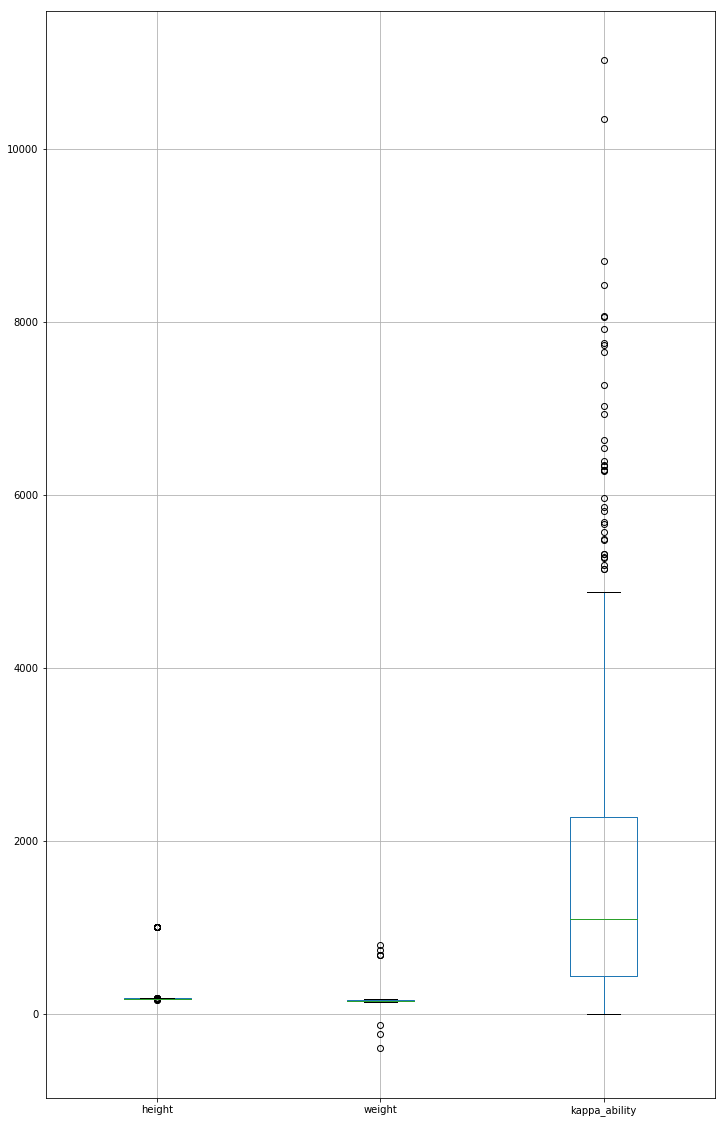

In [31]:
outlier_col = ['height', 'weight','kappa_ability']
df_user.boxplot(outlier_col,figsize=(12,20))
plt.show

## It is better to disregard Kappa_ability as it has lots of outliers 
## To be honest I still do not know what it means and how it contributes lets carry it with us untill we understand

# STAGE 2: EXPLORATORY AND VISUAL ANALYSIS

In [34]:
# ITS BETTER TO COPY THE DATA BEFORE SOME ALTERATIONS 

df_user1 = df_user.copy(True) 
df_user1

,favorite_pizza_topping,favorite_ice_cream_flavor,apm,income,grade,height,reaction_time,city,age,company,kappa_ability,weight,amount,gregariousness,churn
user_id,,,,,,,,,,,,,,,
78268,Spinach,Mint,171,104,X,177,295,C-borough,52,Pause Associates,3363,144,19,57,no
78269,Oregano,Pistachio,218,96,Y,178,305,C-borough,33,Pause Associates,1720,147,57,48,no
78271,Red peppers,Coffee,184,101,Z,185,295,A-town,44,Pause Associates,920,153,79,52,no
78272,Chicken,Coffee,210,100,Z,180,311,A-town,34,Go LLC,1453,154,29,56,no
78274,Tomato,Mint,223,111,Y,181,287,B-ville,41,Go LLC,2219,159,2,47,yes
78275,Spinach,Cookies and Cream,168,114,Y,173,277,A-town,55,Pause Associates,1788,162,130,45,yes
78277,Red peppers,Mint,216,106,Y,184,263,A-town,39,Go LLC,2747,156,26,58,no
78278,Sausage,Red Velvet,186,97,Z,182,299,A-town,63,Go LLC,33,142,16,57,no
78279,Bacon,Cheesecake,196,102,Y,181,339,A-town,46,Go LLC,5138,152,5,51,no


In [35]:
df_user.head()

,favorite_pizza_topping,favorite_ice_cream_flavor,apm,income,grade,height,reaction_time,city,age,company,kappa_ability,weight,amount,gregariousness,churn
user_id,,,,,,,,,,,,,,,
78268,Spinach,Mint,171,104,X,177,295,C-borough,52,Pause Associates,3363,144,19,57,no
78269,Oregano,Pistachio,218,96,Y,178,305,C-borough,33,Pause Associates,1720,147,57,48,no
78271,Red peppers,Coffee,184,101,Z,185,295,A-town,44,Pause Associates,920,153,79,52,no
78272,Chicken,Coffee,210,100,Z,180,311,A-town,34,Go LLC,1453,154,29,56,no
78274,Tomato,Mint,223,111,Y,181,287,B-ville,41,Go LLC,2219,159,2,47,yes


In [36]:
Categorical_features = ["favorite_pizza_topping","grade", "favorite_ice_cream_flavor", "city", "company"]
numerical_features = ["apm", "income", "height", "reaction_time", "age", "weight", "amount", "gregariousness"]
target = ["churn"]

## Lets do some Exploratory Data Analysis, By considering Distribution of Numerical Data w.r.t Target Variable

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A22EA49668>,
      dtype=object)

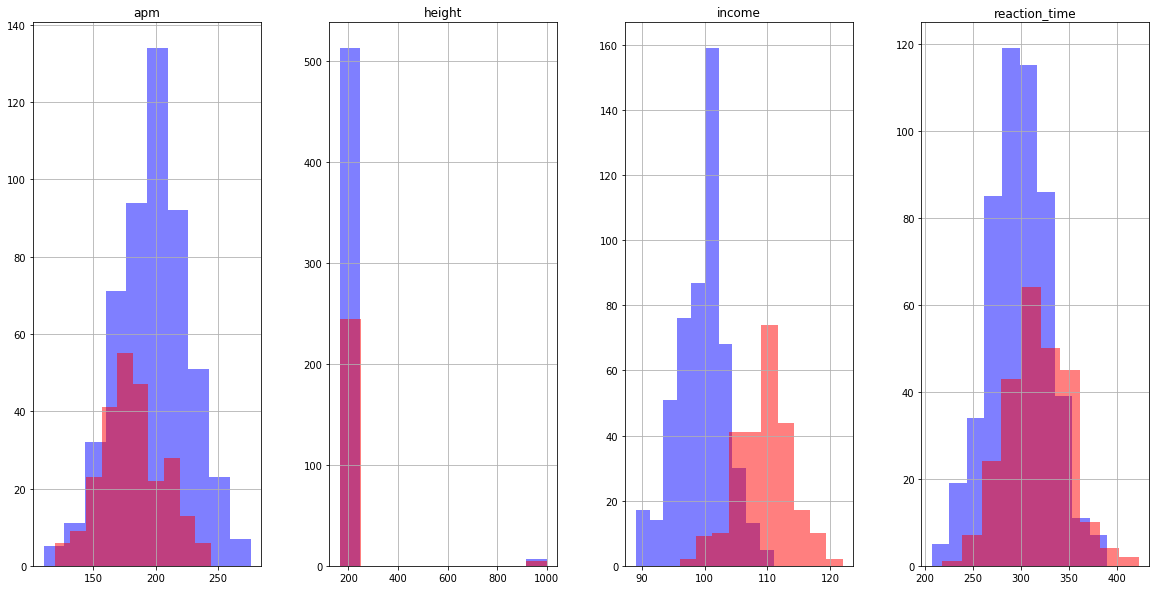

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
df_user[df_user.churn == "no"][numerical_features[:4]].hist( color="blue", alpha=0.5, ax=ax)
df_user[df_user.churn == "yes"][numerical_features[:4]].hist(color="red", alpha=0.5, ax=ax)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A22E5E74A8>,
      dtype=object)

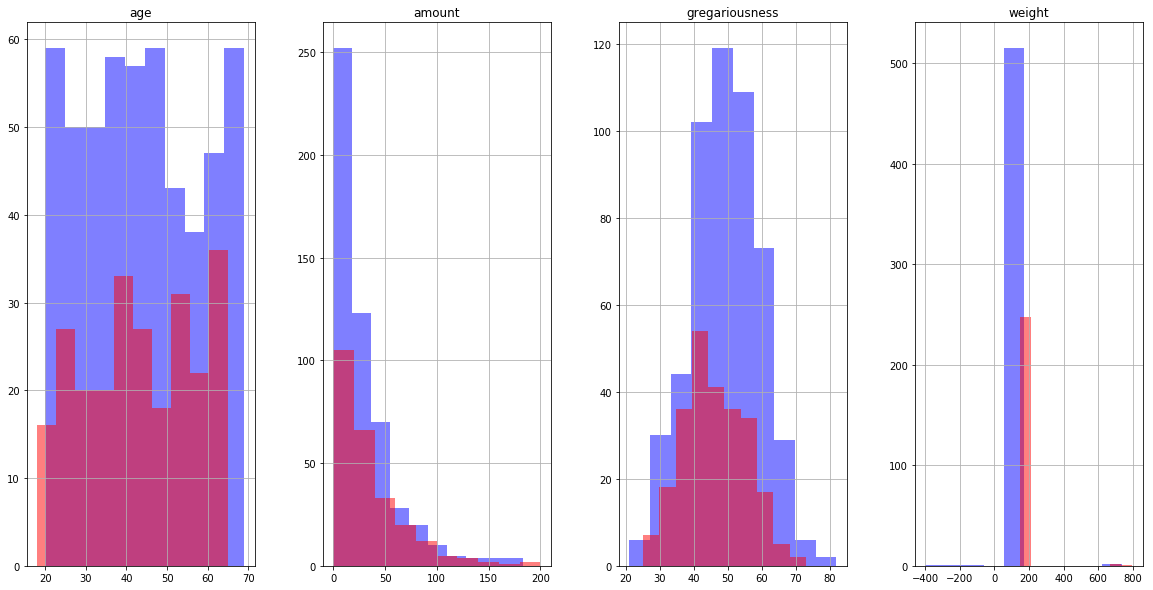

In [38]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
df_user[df_user.churn == "no"][numerical_features[4:]].hist(color="blue", alpha=0.5, ax=ax)
df_user[df_user.churn == "yes"][numerical_features[4:]].hist(color="red", alpha=0.5, ax=ax)

## Some Insights!



### 1) In Income we can observe that people who fall below average or mean Income range are less likely to churn, we can see that <= mean income are good subscribers

### 2)  for apm, greagariousness and reaction time we can observe that the people in and around mean value have less probability of churning

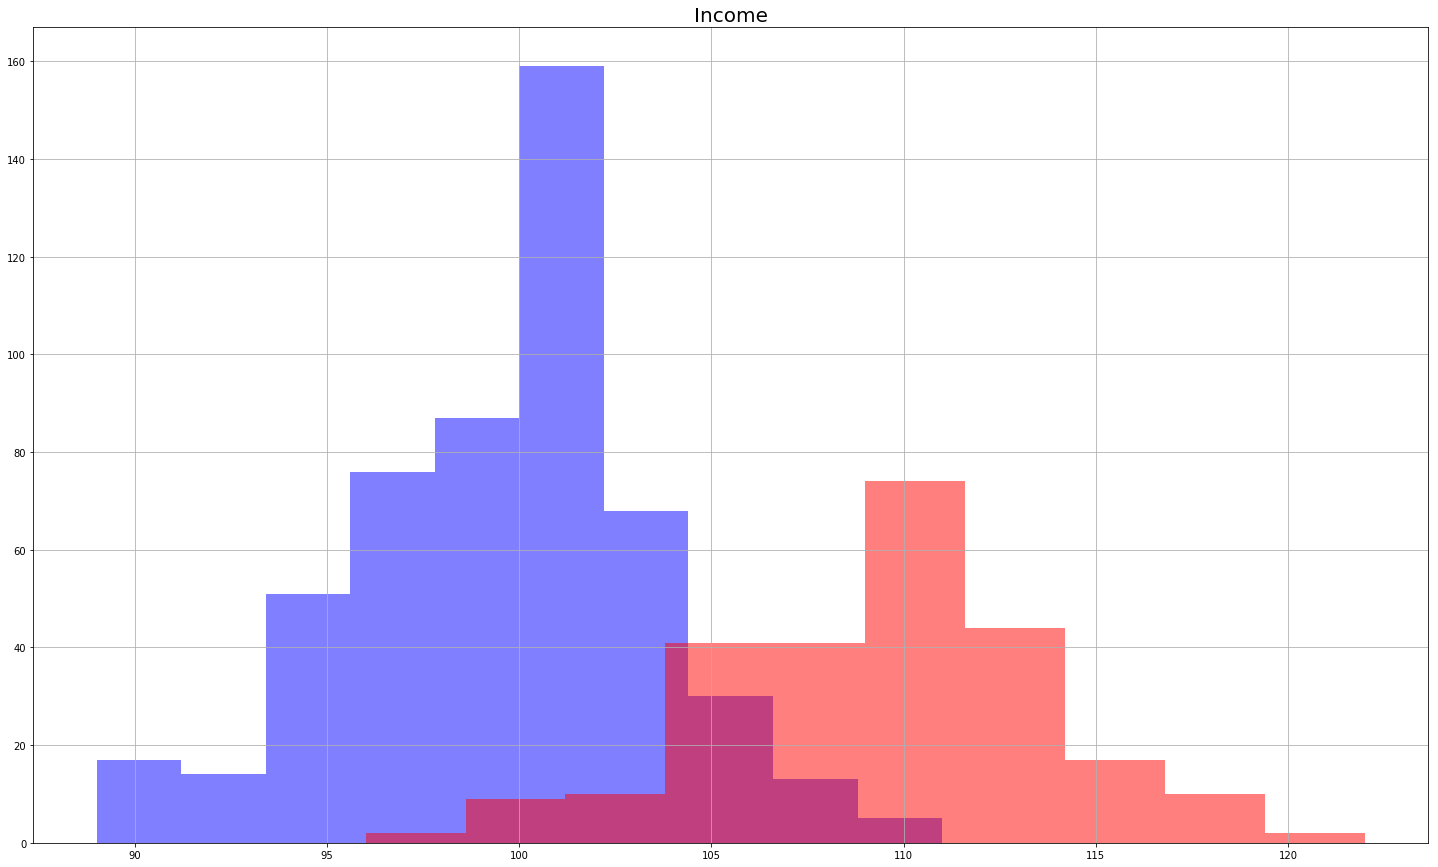

In [39]:

fig, ax = plt.subplots(1, 1, figsize=(25, 15))
ax.set_title("Income",fontsize =20)
df_user[df_user.churn == "no"]['income'].hist( color="blue", alpha=0.5, ax=ax)
df_user[df_user.churn == "yes"]['income'].hist(color="red", alpha=0.5, ax=ax)

##  from above image people with income below mean i.e, 103k are likely not to churn 

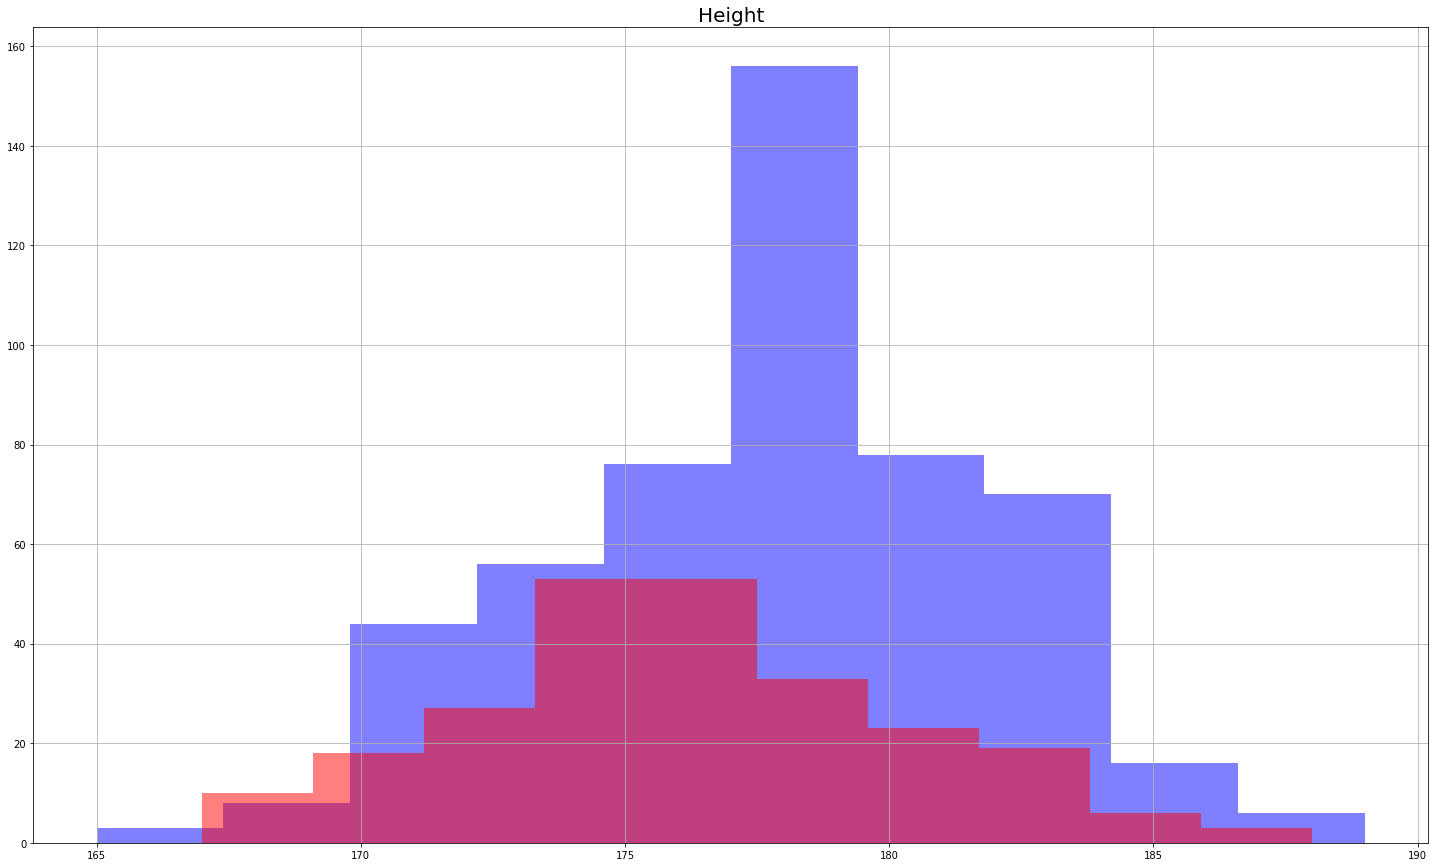

In [40]:

fig, ax = plt.subplots(1, 1, figsize=(25, 15))
ax.set_title("Height",fontsize =20)
df_user[(df_user.churn == "no") & (df_user.height < 250)]['height'].hist( color="blue", alpha=0.5, ax=ax)
df_user[(df_user.churn == "yes") & (df_user.height < 250)]['height'].hist(color="red", alpha=0.5, ax=ax)

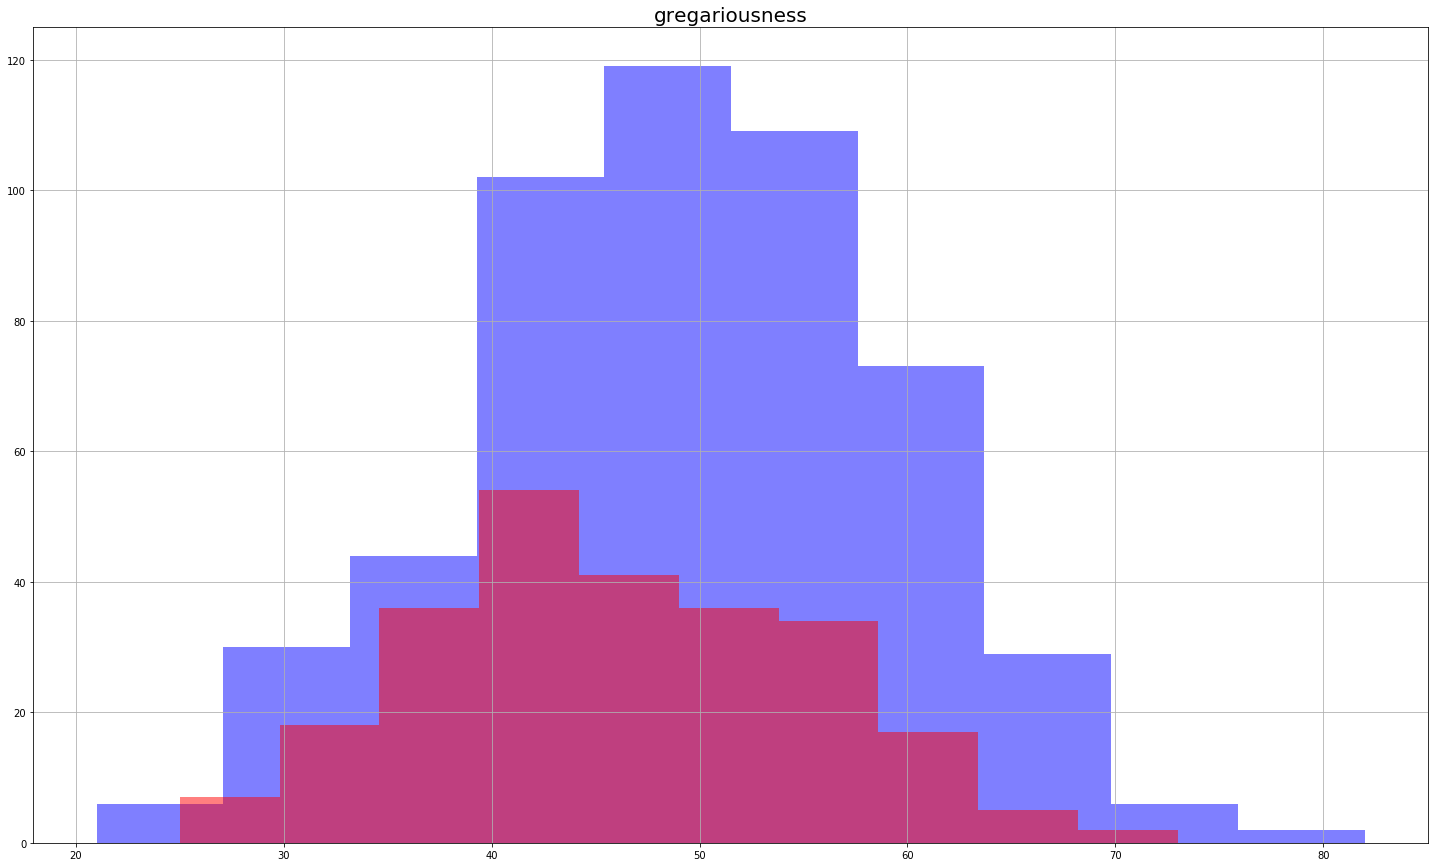

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
ax.set_title("gregariousness",fontsize =20)
df_user[df_user.churn == "no"]['gregariousness'].hist( color="blue", alpha=0.5, ax=ax)
df_user[df_user.churn == "yes"]['gregariousness'].hist(color="red", alpha=0.5, ax=ax)

## Also accoring to gregariousness plot above, 
## people who are more fond of company are less likely churn.

## Categorical Data Distribution

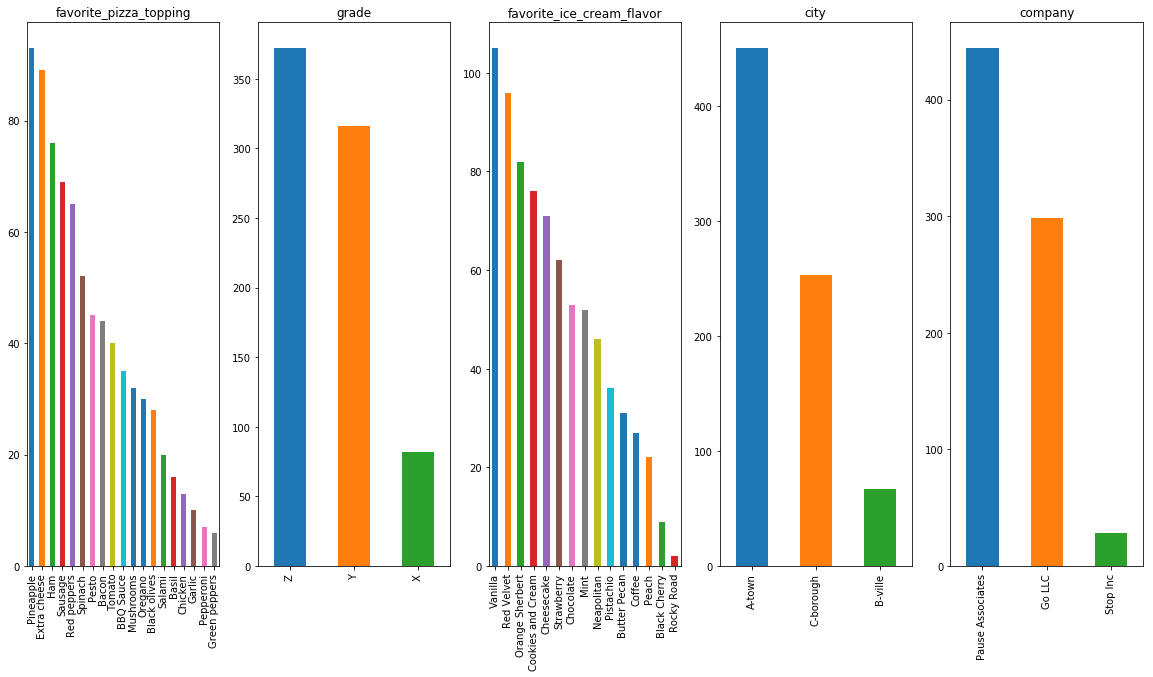

In [42]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10), squeeze=False)
for i, categorical_feature in enumerate(Categorical_features):
   
    df_user[categorical_feature].value_counts().plot('bar', ax=ax[0, i]).set_title(categorical_feature)

## Lets check distribution of Churns based on categorical data 

Text(0.5, 1.0, 'churned')

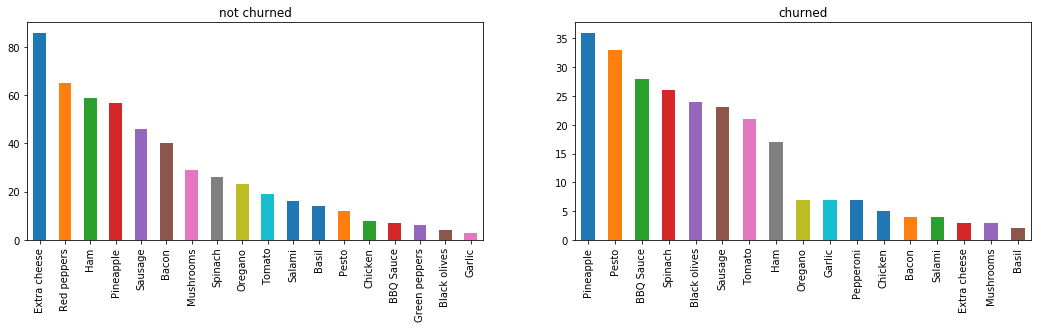

In [43]:

fig, ax = plt.subplots(1, 2, figsize=(18, 4))
df_user[df_user.churn == "no"]['favorite_pizza_topping'].value_counts().plot('bar', ax=ax[0]).set_title('not churned')
df_user[df_user.churn == "yes"]['favorite_pizza_topping'].value_counts().plot('bar', ax=ax[1]).set_title('churned')

## We can clearly see from above images that Extra cheese, red peppers and Ham preferers are less likely to churn in contrary Pesto and BBQ sauce preferers have churned more
## Lets get some numbers for clarity 

In [44]:
print(df_user[df_user.favorite_pizza_topping == 'Extra cheese']['churn'].value_counts()[0]," out of ", df_user[df_user.favorite_pizza_topping == 'Extra cheese']['churn'].value_counts().sum(),"who chose Extra Cheese have NOT CHURNED","\n")
print(df_user[df_user.favorite_pizza_topping == 'Red peppers']['churn'].value_counts()[0]," out of ", df_user[df_user.favorite_pizza_topping == 'Red peppers']['churn'].value_counts().sum(),"who chose Red Peppers have NOT CHURNED","\n")
print(df_user[df_user.favorite_pizza_topping == 'Ham']['churn'].value_counts()[0]," out of ", df_user[df_user.favorite_pizza_topping == 'Ham']['churn'].value_counts().sum(),"who chose Ham have NOT CHURNED","\n","\n","\n")
print(df_user[df_user.favorite_pizza_topping == 'Pesto']['churn'].value_counts()[0]," out of ", df_user[df_user.favorite_pizza_topping == 'Pesto']['churn'].value_counts().sum(),"who choose Pesto have CHURNED","\n")
print(df_user[df_user.favorite_pizza_topping == 'BBQ Sauce']['churn'].value_counts()[0]," out of ", df_user[df_user.favorite_pizza_topping == 'BBQ Sauce']['churn'].value_counts().sum(),"who choose BBQ Sauce have CHURNED","\n")


86  out of  89 who chose Extra Cheese have NOT CHURNED 

65  out of  65 who chose Red Peppers have NOT CHURNED 

59  out of  76 who chose Ham have NOT CHURNED 
 
 

33  out of  45 who choose Pesto have CHURNED 

28  out of  35 who choose BBQ Sauce have CHURNED 



## Red Peppers is the most contributing factor according to above statistics

Text(0.5, 1.0, 'churned')

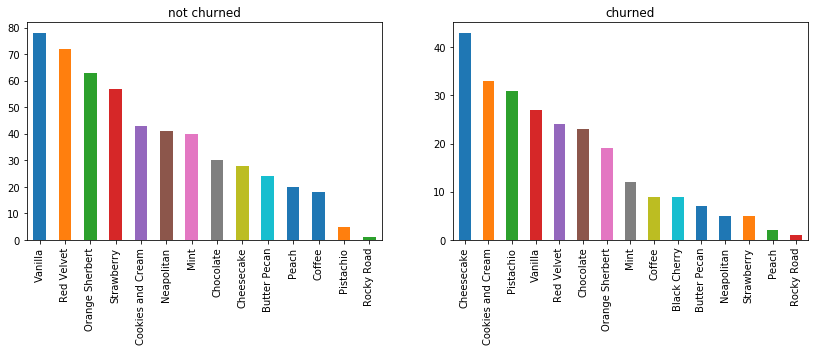

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df_user[df_user.churn == "no"]['favorite_ice_cream_flavor'].value_counts().plot('bar', ax=ax[0]).set_title('not churned')
df_user[df_user.churn == "yes"]['favorite_ice_cream_flavor'].value_counts().plot('bar', ax=ax[1]).set_title('churned')

## Above we can see some top contributors are Vanilla, Red Velvet, strawberry, orange sherbet for Not churning and Pistachio for churning

In [46]:
print(df_user[df_user.favorite_ice_cream_flavor == 'Vanilla']['churn'].value_counts()[0]," out of ", df_user[df_user.favorite_ice_cream_flavor == 'Vanilla']['churn'].value_counts().sum(),"who chose Vanilla have NOT CHURNED","\n")
print(df_user[df_user.favorite_ice_cream_flavor == 'Red Velvet']['churn'].value_counts()[0]," out of ", df_user[df_user.favorite_ice_cream_flavor == 'Red Velvet']['churn'].value_counts().sum(),"who chose Red Velvet have NOT CHURNED","\n")
print(df_user[df_user.favorite_ice_cream_flavor == 'Strawberry']['churn'].value_counts()[0]," out of ", df_user[df_user.favorite_ice_cream_flavor == 'Strawberry']['churn'].value_counts().sum(),"who chose Strawberry have NOT CHURNED","\n")
print(df_user[df_user.favorite_ice_cream_flavor == 'Orange Sherbert']['churn'].value_counts()[0]," out of ", df_user[df_user.favorite_ice_cream_flavor == 'Orange Sherbert']['churn'].value_counts().sum(),"who choose Orange sherbert have NOT CHURNED","\n","\n","\n")
print(df_user[df_user.favorite_ice_cream_flavor == 'Pistachio']['churn'].value_counts()[0]," out of ", df_user[df_user.favorite_ice_cream_flavor == 'Pistachio']['churn'].value_counts().sum(),"who choose Pistachio have CHURNED","\n")

78  out of  105 who chose Vanilla have NOT CHURNED 

72  out of  96 who chose Red Velvet have NOT CHURNED 

57  out of  62 who chose Strawberry have NOT CHURNED 

63  out of  82 who choose Orange sherbert have NOT CHURNED 
 
 

31  out of  36 who choose Pistachio have CHURNED 



## Strawberry and Pistachio are the most contributing factor from above data

Text(0.5, 1.0, 'churned vs Grade')

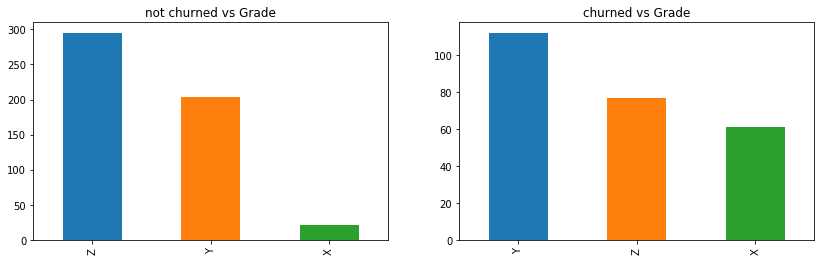

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df_user[df_user.churn == "no"]['grade'].value_counts().plot('bar', ax=ax[0]).set_title('not churned vs Grade')
df_user[df_user.churn == "yes"]['grade'].value_counts().plot('bar', ax=ax[1]).set_title('churned vs Grade')

In [48]:
print(df_user[df_user.grade == 'X']['churn'].value_counts()[0]," out of ", df_user[df_user.grade == 'X']['churn'].value_counts().sum(),"who chose GradeX have CHURNED"," ", "total =", (61/82)*100,"%","\n")
print(df_user[df_user.grade == 'Y']['churn'].value_counts()[0]," out of ", df_user[df_user.grade == 'Y']['churn'].value_counts().sum(),"who chose GradeY have NOT CHURNED","total =", (204/316)*100,"%","\n")
print(df_user[df_user.grade == 'Z']['churn'].value_counts()[0]," out of ", df_user[df_user.grade == 'Z']['churn'].value_counts().sum(),"who chose GradeZ have  NOT CHURNED","total =",(295/372)*100,"%","\n")

61  out of  82 who chose GradeX have CHURNED   total = 74.39024390243902 % 

204  out of  316 who chose GradeY have NOT CHURNED total = 64.55696202531645 % 

295  out of  372 who chose GradeZ have  NOT CHURNED total = 79.3010752688172 % 



In [49]:
# df_user[df_user.grade == 'Z']['churn'].value_counts()

## We Can Clearly Observe that Grade X has a higher probability of getting Customer Churned. and Grade Z has probability of not getting customer Churned

Text(0.5, 1.0, 'churned vs City')

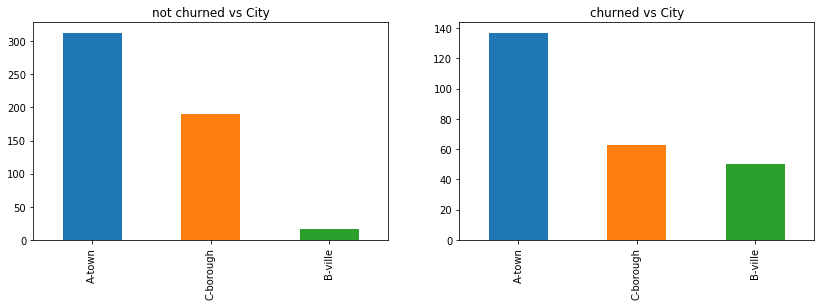

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df_user[df_user.churn == "no"]['city'].value_counts().plot('bar', ax=ax[0]).set_title('not churned vs City')
df_user[df_user.churn == "yes"]['city'].value_counts().plot('bar', ax=ax[1]).set_title('churned vs City')

In [51]:
print(df_user[df_user.city == 'A-town']['churn'].value_counts()[0]," out of ", df_user[df_user.city == 'A-town']['churn'].value_counts().sum(),"who chose CityA have NOT CHURNED"," ", "total =", (313/450)*100,"%","\n")
print(df_user[df_user.city == 'C-borough']['churn'].value_counts()[0]," out of ", df_user[df_user.city == 'C-borough']['churn'].value_counts().sum(),"who chose CityC have NOT CHURNED","total =", (190/253)*100,"%","\n")
print(df_user[df_user.city == 'B-ville']['churn'].value_counts()[0]," out of ", df_user[df_user.city == 'B-ville']['churn'].value_counts().sum(),"who chose CityB have  CHURNED","total =",(50/67)*100,"%","\n")

313  out of  450 who chose CityA have NOT CHURNED   total = 69.55555555555556 % 

190  out of  253 who chose CityC have NOT CHURNED total = 75.09881422924902 % 

50  out of  67 who chose CityB have  CHURNED total = 74.6268656716418 % 



## People Living in B-Ville are not interested in the Company and are more likely to Churn.
## People in C-borough have not churned much 

## Lets go further and check whether the people in B-ville are given more of X grade(Just an analysis)

In [52]:
print((df_user[df_user.city == "B-ville"]["grade"].value_counts()[2])/(df_user.grade.value_counts()[2])*100)
print(df_user[df_user.city == "B-ville"]["grade"].value_counts()[2], "out of ", df_user.grade.value_counts()[2]," Have gradex")

15.853658536585366
13 out of  82  Have gradex


## No its  a good thing in the perspective of a predictive model designer that the variables are not correlated and are affecting independently but at the same time we do not have a proper reason why B-ville people are likely to Churn

Text(0.5, 1.0, 'churned vs Company')

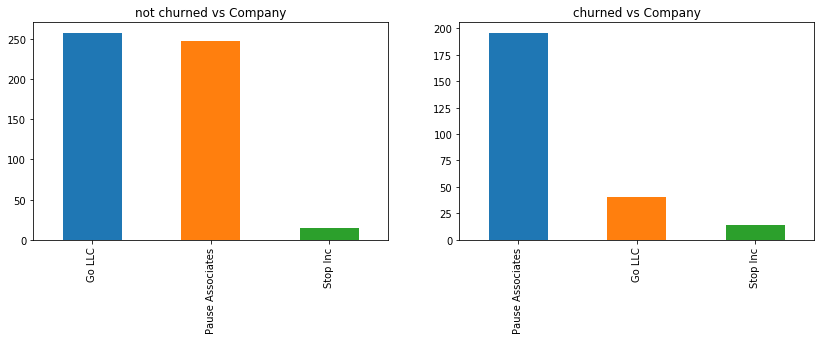

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df_user[df_user.churn == "no"]['company'].value_counts().plot('bar', ax=ax[0]).set_title('not churned vs Company')
df_user[df_user.churn == "yes"]['company'].value_counts().plot('bar', ax=ax[1]).set_title('churned vs Company')

In [54]:
print(df_user[df_user.company == 'Go LLC']['churn'].value_counts()[0]," out of ", df_user[df_user.company == 'Go LLC']['churn'].value_counts().sum(),"who chose Company Go LLC have NOT CHURNED"," ", "total =", (258/298)*100,"%","\n")
print(df_user[df_user.company == 'Pause Associates']['churn'].value_counts()[0]," out of ", df_user[df_user.company == 'Pause Associates']['churn'].value_counts().sum(),"who chose Company Pause have NOT CHURNED","total =", (248/444)*100,"%","\n")
print(df_user[df_user.company == 'Stop Inc']['churn'].value_counts()[0]," out of ", df_user[df_user.company == 'Stop Inc']['churn'].value_counts().sum(),"who chose Company Stop have  CHURNED","total =",(14/28)*100,"%","\n")

258  out of  298 who chose Company Go LLC have NOT CHURNED   total = 86.57718120805369 % 

248  out of  444 who chose Company Pause have NOT CHURNED total = 55.85585585585585 % 

14  out of  28 who chose Company Stop have  CHURNED total = 50.0 % 



## We can clearly see that User in the Company Go LLC is very unlikely to Churn and are loyal Customer.
##
## So Now the people from Go LLC who like GradeZ and who live in C-borough are likely to stay
##
## People with city B-ville and gradeX are likely to Churn

In [55]:
print(df_user[df_user.company == "Go LLC"]["city"].value_counts())
print(df_user[df_user.company == "Go LLC"]["grade"].value_counts())
print(df_user[df_user.company == "Go LLC"]["grade"].value_counts()/ (df_user.grade.value_counts())*100,"%")


A-town       179
C-borough    104
B-ville       15
Name: city, dtype: int64
Z    156
Y    120
X     22
Name: grade, dtype: int64
Z    41.935484
Y    37.974684
X    26.829268
Name: grade, dtype: float64 %


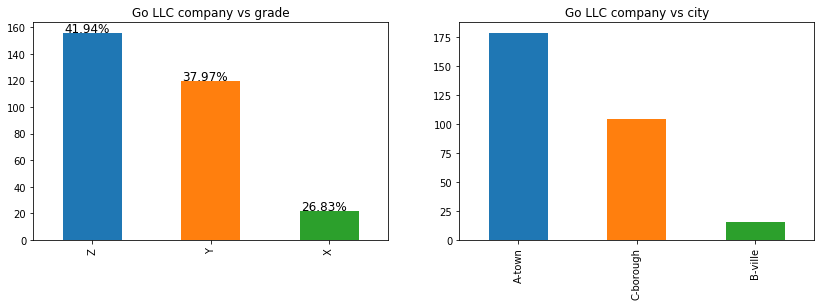

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].set_title('Go LLC company vs grade')
ax[1].set_title('Go LLC company vs city')
df_user[df_user.company == "Go LLC"]["grade"].value_counts().plot('bar',ax = ax[0])
for j,i in enumerate(ax[0].patches):
    # get_x pulls left or right; get_height pushes up or down
    ax[0].text(i.get_x()+.01, i.get_height()+.1, \
            str(round((df_user[df_user.company == "Go LLC"]["grade"].value_counts()/ (df_user.grade.value_counts()))[j]*100, 2))+'%', fontsize=12,
                color='black')
df_user[df_user.company == "Go LLC"]["city"].value_counts().plot('bar',ax = ax[1])


## So People from Go LLC live mostly in A-town/C-borough and they mostly prefer X grade, So there is some relation 

### We did see some relation with Income while going through histogram lets group it for better understanding, groups will be low mid and high

### And also Age should give us some information, lets check that as well

In [57]:
df_user['incomelev'] = pd.cut(df_user.income,bins = 3, labels=['low','average','high'])
df_user.incomelev.value_counts()# Lets consider Income as three different groups

average    377
low        320
high        73
Name: incomelev, dtype: int64

In [58]:
df_user['agelev'] = pd.cut(df_user.age,bins = 3, labels=['young','adult','senior'])
df_user.agelev.value_counts()# Lets consider age as three different groups

adult     289
young     249
senior    232
Name: agelev, dtype: int64

Text(0.5, 1.0, 'churned vs incomelev')

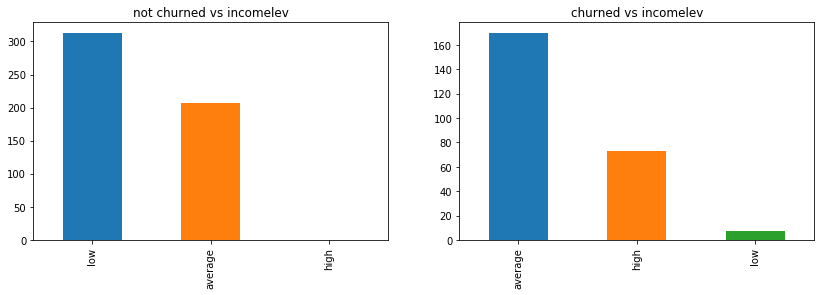

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df_user[df_user.churn == "no"]['incomelev'].value_counts().plot('bar', ax=ax[0]).set_title('not churned vs incomelev')
df_user[df_user.churn == "yes"]['incomelev'].value_counts().plot('bar', ax=ax[1]).set_title('churned vs incomelev')

Text(0.5, 1.0, 'churned vs agelev')

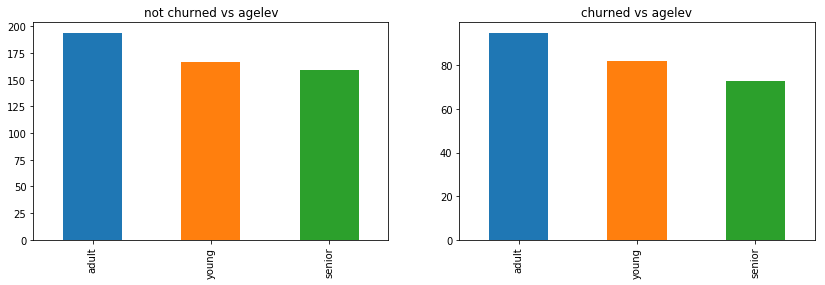

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df_user[df_user.churn == "no"]['agelev'].value_counts().plot('bar', ax=ax[0]).set_title('not churned vs agelev')
df_user[df_user.churn == "yes"]['agelev'].value_counts().plot('bar', ax=ax[1]).set_title('churned vs agelev')

In [61]:
print(df_user[df_user.incomelev == 'low']['churn'].value_counts()[0]," out of ", df_user[df_user.incomelev == 'low']['churn'].value_counts().sum(),"who fall under low income range have NOT CHURNED"," ", "total =", (313/320)*100,"%","\n")
print(df_user[df_user.incomelev == 'average']['churn'].value_counts()[0]," out of ", df_user[df_user.incomelev == 'average']['churn'].value_counts().sum(),"who fall under average income range have NOT CHURNED","total =", (207/377)*100,"%","\n")
print(df_user[df_user.incomelev == 'high']['churn'].value_counts()[0]," out of ", df_user[df_user.incomelev == 'high']['churn'].value_counts().sum(),"who fall under high income range have  CHURNED","total =",(73/73)*100,"%","\n")

313  out of  320 who fall under low income range have NOT CHURNED   total = 97.8125 % 

207  out of  377 who fall under average income range have NOT CHURNED total = 54.907161803713535 % 

73  out of  73 who fall under high income range have  CHURNED total = 100.0 % 



In [62]:
print(df_user[df_user.agelev == 'young']['churn'].value_counts()[0]," out of ", df_user[df_user.agelev == 'young']['churn'].value_counts().sum(),"who fall under young age have NOT CHURNED"," ", "total =", (167/249)*100,"%","\n")
print(df_user[df_user.agelev == 'adult']['churn'].value_counts()[0]," out of ", df_user[df_user.agelev == 'adult']['churn'].value_counts().sum(),"who fall under adult age have NOT CHURNED","total =", (194/289)*100,"%","\n")
print(df_user[df_user.agelev == 'senior']['churn'].value_counts()[0]," out of ", df_user[df_user.agelev == 'senior']['churn'].value_counts().sum(),"who fall under senior age have NOT CHURNED","total =",(159/232)*100,"%","\n")

167  out of  249 who fall under young age have NOT CHURNED   total = 67.06827309236948 % 

194  out of  289 who fall under adult age have NOT CHURNED total = 67.1280276816609 % 

159  out of  232 who fall under senior age have NOT CHURNED total = 68.53448275862068 % 



## Some Income and age related Insights
## 1) Low Income range users not  likely to churn
## 2) High Income range people always have churned
## 3) Not much relation between age and churn

In [63]:
print("people with low range income grade distribution","\n",((df_user[df_user.incomelev == "low"]["grade"].value_counts(sort = True)[:3])/(df_user.grade.value_counts())*100).sort_values(ascending = False),"\n" )
print("people with average range income grade distribution","\n",((df_user[df_user.incomelev == "average"]["grade"].value_counts(sort = True)[:3])/(df_user.grade.value_counts())*100).sort_values(ascending = False),"\n" )
print("people with high range income grade distribution","\n",((df_user[df_user.incomelev == "high"]["grade"].value_counts(sort = True)[:3])/(df_user.grade.value_counts())*100).sort_values(ascending = False) )


people with low range income grade distribution 
 Z    48.118280
Y    40.506329
X    15.853659
Name: grade, dtype: float64 

people with average range income grade distribution 
 X    62.195122
Y    48.734177
Z    46.236559
Name: grade, dtype: float64 

people with high range income grade distribution 
 X    21.951220
Y    10.759494
Z     5.645161
Name: grade, dtype: float64


## Low income people prefer more of Grade-z and Grade-Y May be its inexpensive and also we have good rate of not churning in Grade-z products

In [64]:

print("people with young age income distribution","\n",((df_user[df_user.agelev == "young"]["incomelev"].value_counts(sort = True)[:3])/(df_user.incomelev.value_counts())*100).sort_values(ascending = False),"\n" )
print("people with adult age  income distribution","\n",((df_user[df_user.agelev == "adult"]["incomelev"].value_counts(sort = True)[:3])/(df_user.incomelev.value_counts())*100).sort_values(ascending = False),"\n" )
print("people with senior age  income distribution","\n",((df_user[df_user.agelev == "senior"]["incomelev"].value_counts(sort = True)[:3])/(df_user.incomelev.value_counts())*100).sort_values(ascending = False) )


people with young age income distribution 
 average    33.952255
low        31.562500
high       27.397260
Name: incomelev, dtype: float64 

people with adult age  income distribution 
 high       42.465753
low        37.500000
average    36.604775
Name: incomelev, dtype: float64 

people with senior age  income distribution 
 low        30.937500
high       30.136986
average    29.442971
Name: incomelev, dtype: float64


In [65]:
print("Go LLC employees income distribution","\n", df_user[df_user.company == "Go LLC"]["incomelev"].value_counts(sort = True),"\n")
print("Pause employees income distribution","\n", df_user[df_user.company == "Pause Associates"]["incomelev"].value_counts(sort = True))
print("Stop INC employees income distribution","\n", df_user[df_user.company == "Stop Inc"]["incomelev"].value_counts(sort = True))

Go LLC employees income distribution 
 low        154
average    137
high         7
Name: incomelev, dtype: int64 

Pause employees income distribution 
 average    226
low        160
high        58
Name: incomelev, dtype: int64
Stop INC employees income distribution 
 average    14
high        8
low         6
Name: incomelev, dtype: int64


## Go LLC company has more of Low income employees and they are prefering grade-x and all correlate to not churning, We can almost split and tell without decision tree models :)

## Same can be done for greagriousness and reaction time......(Future work)

Text(0.5, 1.0, 'churned')

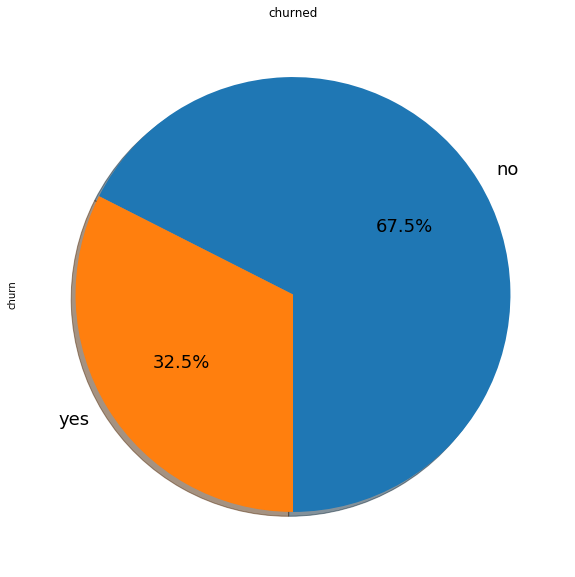

In [66]:
df_user['churn'].value_counts().plot('pie',autopct='%1.1f%%', shadow=True, startangle=270,fontsize = 18,figsize = (20,10)).set_title('churned')

# STAGE 3: MODELLING 

## Before modelling lets select the features we need and drop some
## Lets leave out height weight and Kappa

In [67]:
#df_user.drop(['height', 'weight', 'kappa_ability'],axis = 1, inplace = True)

Categorical_features = ["favorite_pizza_topping","grade", "favorite_ice_cream_flavor", "city", "company"] #lets define them again
numerical_features = ["apm", "income",  "reaction_time", "age",  "amount", "gregariousness"] 
target = ["churn"]



## As models take in Only numerical Data  lets one hot encode followed by Integer encoding it using python libraries

In [68]:
from sklearn.preprocessing import LabelEncoder

categorical_feature_names = []
for categorical in Categorical_features + [target]:
    label_encoder = LabelEncoder()
    df_user[categorical] = label_encoder.fit_transform(df_user[categorical])
    names = label_encoder.classes_.tolist()
    print('Label encoder %s - values: %s' % (categorical, names))
    if categorical == target:
        continue
    categorical_feature_names.extend([categorical + '_' + str(name) for name in names])

Label encoder favorite_pizza_topping - values: ['BBQ Sauce', 'Bacon', 'Basil', 'Black olives', 'Chicken', 'Extra cheese', 'Garlic', 'Green peppers', 'Ham', 'Mushrooms', 'Oregano', 'Pepperoni', 'Pesto', 'Pineapple', 'Red peppers', 'Salami', 'Sausage', 'Spinach', 'Tomato']
Label encoder grade - values: ['X', 'Y', 'Z']
Label encoder favorite_ice_cream_flavor - values: ['Black Cherry', 'Butter Pecan', 'Cheesecake', 'Chocolate', 'Coffee', 'Cookies and Cream', 'Mint', 'Neapolitan', 'Orange Sherbert', 'Peach', 'Pistachio', 'Red Velvet', 'Rocky Road', 'Strawberry', 'Vanilla']
Label encoder city - values: ['A-town', 'B-ville', 'C-borough']
Label encoder company - values: ['Go LLC', 'Pause Associates', 'Stop Inc']
Label encoder ['churn'] - values: ['no', 'yes']


C:\Users\13154\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
df_user.drop(['incomelev','agelev'],axis = 1, inplace=True)
df_user.head()

,favorite_pizza_topping,favorite_ice_cream_flavor,apm,income,grade,height,reaction_time,city,age,company,kappa_ability,weight,amount,gregariousness,churn
user_id,,,,,,,,,,,,,,,
78268,17,6,171,104,0,177,295,2,52,1,3363,144,19,57,0
78269,10,10,218,96,1,178,305,2,33,1,1720,147,57,48,0
78271,14,4,184,101,2,185,295,0,44,1,920,153,79,52,0
78272,4,4,210,100,2,180,311,0,34,0,1453,154,29,56,0
78274,18,6,223,111,1,181,287,1,41,0,2219,159,2,47,1


In [70]:
# company = categorical_feature_names[40:]
# pizza
#categorical_feature_names

In [71]:
pizza = categorical_feature_names[:19]
grade = categorical_feature_names[19:22]
icecream = categorical_feature_names[22:37]
city = categorical_feature_names[37:40]
company = categorical_feature_names[40:]


In [72]:
df_user2 = pd.concat([df_user, pd.get_dummies(df_user.favorite_pizza_topping)], axis=1)
df_user2 = pd.concat([df_user2, pd.get_dummies(df_user.company)], axis=1)
df_user2 = pd.concat([df_user2, pd.get_dummies(df_user.city)], axis=1)
df_user2 = pd.concat([df_user2, pd.get_dummies(df_user.grade)], axis=1)
df_user2 = pd.concat([df_user2, pd.get_dummies(df_user.favorite_ice_cream_flavor)], axis=1)
df_user2.drop(['favorite_ice_cream_flavor','favorite_pizza_topping','grade','city','company'],axis = 1, inplace=True)


# This is the process of one hot encoding, observe I have one hot encoded only df_user2 just to 
# show the changes and importance of Onhot encoding 






<h1/> 
This is the process of one hot encoding, observe I have one hot encoded only df_user2 just to 
 show the changes and importance of One hot encoding <h1/> 

In [73]:
df_user2.columns = ['apm',         'income',         'height',  'reaction_time',
                  'age',  'kappa_ability',         'weight',         'amount',
       'gregariousness',          'churn',                pizza[0],                pizza[1],
                      pizza[2],                pizza[3],                pizza[4],               pizza[5],
                      pizza[6],                pizza[7],                pizza[8],                pizza[9],
                     pizza[10],               pizza[11],               pizza[12],               pizza[13],
                     pizza[14],               pizza[15],               pizza[16],               pizza[17],
                     pizza[18],                company[0],                company[1],                company[2],
                      city[0],                city[1],                city[2],                grade[0],
                      grade[1],                grade[2],                icecream[0],                icecream[1],
                      icecream[2],                icecream[3],               icecream[4],               icecream[5],
                      icecream[6],                icecream[7],                icecream[8],                icecream[9],
                     icecream[10],               icecream[11],              icecream[12],              icecream[13],
                     icecream[14]]

#Changing teh column names for reference

In [74]:
#df_user2.drop('kappa_ability', axis = 1, inplace = True)
df_user2.head()

,apm,income,height,reaction_time,age,kappa_ability,weight,amount,gregariousness,churn,...,favorite_ice_cream_flavor_Cookies and Cream,favorite_ice_cream_flavor_Mint,favorite_ice_cream_flavor_Neapolitan,favorite_ice_cream_flavor_Orange Sherbert,favorite_ice_cream_flavor_Peach,favorite_ice_cream_flavor_Pistachio,favorite_ice_cream_flavor_Red Velvet,favorite_ice_cream_flavor_Rocky Road,favorite_ice_cream_flavor_Strawberry,favorite_ice_cream_flavor_Vanilla
user_id,,,,,,,,,,,,,,,,,,,,,
78268,171,104,177,295,52,3363,144,19,57,0,...,0,1,0,0,0,0,0,0,0,0
78269,218,96,178,305,33,1720,147,57,48,0,...,0,0,0,0,0,1,0,0,0,0
78271,184,101,185,295,44,920,153,79,52,0,...,0,0,0,0,0,0,0,0,0,0
78272,210,100,180,311,34,1453,154,29,56,0,...,0,0,0,0,0,0,0,0,0,0
78274,223,111,181,287,41,2219,159,2,47,1,...,0,1,0,0,0,0,0,0,0,0


In [75]:

df_user.to_csv(path_or_buf='out.csv')
df_user2.to_csv(path_or_buf='out1.csv')
df_user2.head()
# saving some preprocessed dataframes

,apm,income,height,reaction_time,age,kappa_ability,weight,amount,gregariousness,churn,...,favorite_ice_cream_flavor_Cookies and Cream,favorite_ice_cream_flavor_Mint,favorite_ice_cream_flavor_Neapolitan,favorite_ice_cream_flavor_Orange Sherbert,favorite_ice_cream_flavor_Peach,favorite_ice_cream_flavor_Pistachio,favorite_ice_cream_flavor_Red Velvet,favorite_ice_cream_flavor_Rocky Road,favorite_ice_cream_flavor_Strawberry,favorite_ice_cream_flavor_Vanilla
user_id,,,,,,,,,,,,,,,,,,,,,
78268,171,104,177,295,52,3363,144,19,57,0,...,0,1,0,0,0,0,0,0,0,0
78269,218,96,178,305,33,1720,147,57,48,0,...,0,0,0,0,0,1,0,0,0,0
78271,184,101,185,295,44,920,153,79,52,0,...,0,0,0,0,0,0,0,0,0,0
78272,210,100,180,311,34,1453,154,29,56,0,...,0,0,0,0,0,0,0,0,0,0
78274,223,111,181,287,41,2219,159,2,47,1,...,0,1,0,0,0,0,0,0,0,0


In [76]:
df_user2['churn1'] = df_user2.churn
df_user2.drop('churn',axis =1,inplace = True)
df_user2 = df_user2.rename(columns={'churn1':'churn'})

In [77]:
df_user['churn1'] = df_user.churn
df_user.drop('churn',axis =1,inplace = True)
df_user = df_user.rename(columns={'churn1':'churn'})

In [78]:
#df_user['incomelev'] = label_encoder.fit_transform(df_user['incomelev'])
df_user.head()

,favorite_pizza_topping,favorite_ice_cream_flavor,apm,income,grade,height,reaction_time,city,age,company,kappa_ability,weight,amount,gregariousness,churn
user_id,,,,,,,,,,,,,,,
78268,17,6,171,104,0,177,295,2,52,1,3363,144,19,57,0
78269,10,10,218,96,1,178,305,2,33,1,1720,147,57,48,0
78271,14,4,184,101,2,185,295,0,44,1,920,153,79,52,0
78272,4,4,210,100,2,180,311,0,34,0,1453,154,29,56,0
78274,18,6,223,111,1,181,287,1,41,0,2219,159,2,47,1


In [79]:
#df_user2['incomelev'] = label_encoder.fit_transform(df_user2['incomelev'])
df_user2.head()

,apm,income,height,reaction_time,age,kappa_ability,weight,amount,gregariousness,favorite_pizza_topping_BBQ Sauce,...,favorite_ice_cream_flavor_Mint,favorite_ice_cream_flavor_Neapolitan,favorite_ice_cream_flavor_Orange Sherbert,favorite_ice_cream_flavor_Peach,favorite_ice_cream_flavor_Pistachio,favorite_ice_cream_flavor_Red Velvet,favorite_ice_cream_flavor_Rocky Road,favorite_ice_cream_flavor_Strawberry,favorite_ice_cream_flavor_Vanilla,churn
user_id,,,,,,,,,,,,,,,,,,,,,
78268,171,104,177,295,52,3363,144,19,57,0,...,1,0,0,0,0,0,0,0,0,0
78269,218,96,178,305,33,1720,147,57,48,0,...,0,0,0,0,1,0,0,0,0,0
78271,184,101,185,295,44,920,153,79,52,0,...,0,0,0,0,0,0,0,0,0,0
78272,210,100,180,311,34,1453,154,29,56,0,...,0,0,0,0,0,0,0,0,0,0
78274,223,111,181,287,41,2219,159,2,47,0,...,1,0,0,0,0,0,0,0,0,1


## Splitting the Data set for Training and Testing in the ratio 80:20
##

## Also I am modelling in 4 parts for observation and analysis



## 1) Modelling on the data which is only Integer encoded
## 2) Modelling on the data which is One hot encoded
## 3) Modelling on the data with integration of user activity dataset
## 4) Modelling on the data without pizza topping and Icecream preference columns

In [80]:
X = df_user
y = df_user.iloc[:,-1]

X2 = df_user2
y2 = df_user2.iloc[:,-1]

#creating Training and testing datasets

## First part is the modelling of data with integer encoding, (Can be skipped till next heading or the graph comparing model accuracy)

In [81]:
X.drop('churn',axis = 1, inplace = True)
X2.drop('churn',axis = 1, inplace = True)
#X.drop(['incomelev','agelev'],axis = 1, inplace = True)


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

#splitting dataset for training and testing

## Model for the integer encoded data 

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Logistic regression Model

C:\Users\13154\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

#Accuracy of the model with Integer encoding

0.8181818181818182


In [85]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)



company                      1.081910
income                       0.156281
favorite_pizza_topping       0.028593
amount                       0.009119
weight                       0.004093
kappa_ability                0.000072
reaction_time               -0.000381
height                      -0.000807
age                         -0.017922
apm                         -0.044110
gregariousness              -0.073197
favorite_ice_cream_flavor   -0.139218
city                        -0.143888
grade                       -1.306530
dtype: float64

## We can observe that when we integer encode the variables,
## the grade has a weight of -1.306 , It is trying to say as grade increases churn decreases, grade-z is considered as 2 hence the assumption. 
## This clearly shows we shouldnt integer encode the nominal variables

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        97
           1       0.76      0.74      0.75        57

   micro avg       0.82      0.82      0.82       154
   macro avg       0.81      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



## Some different Models for comparison

In [87]:
from sklearn.ensemble import RandomForestClassifier #use RandomForestRegressor for regression problem
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
modelRandom= RandomForestClassifier(n_estimators=1000,n_jobs=-1,verbose=1)
# Train the model using the training sets and check score
modelRandom.fit(X_train, y_train)
modelRandom.score(X_train, y_train)
#Predict Output
predicted1= modelRandom.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


In [88]:
modelComp = []
modelComp.append(metrics.accuracy_score(y_test, predicted1))
modelComp.append(metrics.accuracy_score(y_test, prediction_test))

In [89]:
print (metrics.accuracy_score(y_test, predicted1))
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted1))

0.9675324675324676
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        97
           1       0.96      0.95      0.96        57

   micro avg       0.97      0.97      0.97       154
   macro avg       0.97      0.96      0.97       154
weighted avg       0.97      0.97      0.97       154



In [90]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1,verbose=1)
modelGB.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.6039            0.30s
         2           0.3379            0.15s
         3           0.2884            0.13s
         4           0.2562            0.12s
         5           0.2215            0.11s
         6           0.1982            0.09s
         7           0.1796            0.10s
         8           0.1779            0.09s
         9           0.1726            0.08s
        10           0.1518            0.08s
        20           0.0806            0.05s
        30           0.0471            0.04s
        40           0.0331            0.03s
        50           0.0224            0.03s
        60           0.0178            0.02s
        70           0.0130            0.02s
        80           0.0094            0.01s
        90           0.0071            0.00s
       100           0.0054            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [91]:
predicted2 = modelGB.predict(X_test)

In [92]:
modelComp.append(metrics.accuracy_score(y_test, predicted2))
print(metrics.accuracy_score(y_test, predicted2))
print(classification_report(y_test,predicted2))

0.9545454545454546
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        97
           1       0.93      0.95      0.94        57

   micro avg       0.95      0.95      0.95       154
   macro avg       0.95      0.95      0.95       154
weighted avg       0.95      0.95      0.95       154



In [93]:
from sklearn.svm import SVC

In [94]:
modelSVC = SVC(kernel='linear',verbose = True)

In [95]:
modelSVC.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=True)

In [96]:
predicted3 = modelSVC.predict(X_test)

In [97]:
modelComp.append(metrics.accuracy_score(y_test, predicted3))
print(metrics.accuracy_score(y_test,predicted3))
print(classification_report(y_test,predicted3))

0.935064935064935
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        97
           1       0.87      0.96      0.92        57

   micro avg       0.94      0.94      0.94       154
   macro avg       0.93      0.94      0.93       154
weighted avg       0.94      0.94      0.94       154



In [98]:
re = np.reshape(modelComp,(1,4))

In [99]:
modelCompare = pd.DataFrame(data = re, columns = ['RandomForest', 'LogisticRegression', 'GradientBoosting', 'SVM'])

## We can see the comparison of the model output for integer encoded features

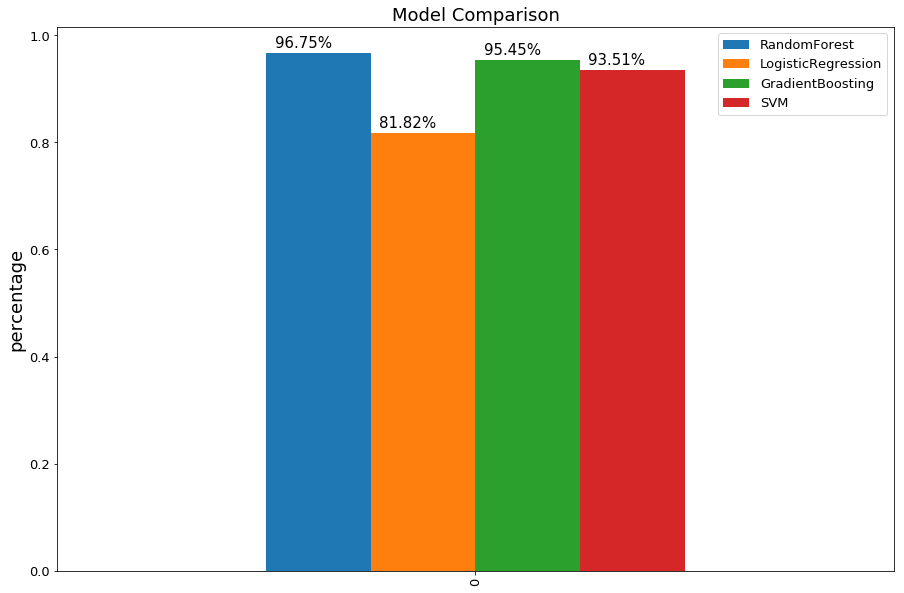

In [100]:
ax = modelCompare.plot(kind='bar', figsize=(15,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Model Comparison", fontsize=18)
ax.set_ylabel("percentage", fontsize=18);
ax.legend(fontsize = 13)
ax.xticks = ['1','2','3','4']


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
#total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.01, i.get_height()+.01, \
            str(round((i.get_height())*100, 2))+'%', fontsize=15,
                color='black')


## Lets do Some Finetuning and Feature engineering/Manipulation

In [101]:
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

company                      1.081910
income                       0.156281
favorite_pizza_topping       0.028593
amount                       0.009119
weight                       0.004093
kappa_ability                0.000072
reaction_time               -0.000381
height                      -0.000807
age                         -0.017922
apm                         -0.044110
gregariousness              -0.073197
favorite_ice_cream_flavor   -0.139218
city                        -0.143888
grade                       -1.306530
dtype: float64

## It can be observed that some variables have a positive relation to our predicted variable and some have a negative relation. A positive value has a positive impact on our predicted variable. A good example is “Company”: The positive relation to churn means that having customer from this Company also increases the probability of a customer to churn. On the other hand that “Grade” is in a highly negative relation to the predicted variable, which means that customers with this type of Grade are very unlikely to churn. But we can also see that some variables do not make sense in the first point. “Favorite_ice_Cream_Flavor” is on good position in terms of a negative impact on churn. While we would expect that this makes a customer stay, by prviding them with a Favorable Ice cream flavor, Or it is just a Coincidence.

In [102]:
df_user.head(10)

,favorite_pizza_topping,favorite_ice_cream_flavor,apm,income,grade,height,reaction_time,city,age,company,kappa_ability,weight,amount,gregariousness
user_id,,,,,,,,,,,,,,
78268,17,6,171,104,0,177,295,2,52,1,3363,144,19,57
78269,10,10,218,96,1,178,305,2,33,1,1720,147,57,48
78271,14,4,184,101,2,185,295,0,44,1,920,153,79,52
78272,4,4,210,100,2,180,311,0,34,0,1453,154,29,56
78274,18,6,223,111,1,181,287,1,41,0,2219,159,2,47
78275,17,5,168,114,1,173,277,0,55,1,1788,162,130,45
78277,14,6,216,106,1,184,263,0,39,0,2747,156,26,58
78278,16,11,186,97,2,182,299,0,63,0,33,142,16,57
78279,1,2,196,102,1,181,339,0,46,0,5138,152,5,51


## lets find out which grade, which ice cream or in general what is actually making a difference by finding model outputs for One hot encoded data

In [103]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X2_train, y2_train)

C:\Users\13154\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [104]:
from sklearn import metrics
prediction_test2 = model.predict(X2_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y2_test, prediction_test2))

0.8701298701298701


In [105]:
weights = pd.Series(model.coef_[0],index=X2.columns.values)
weights.sort_values(ascending = False)

favorite_ice_cream_flavor_Pistachio            1.672418
favorite_pizza_topping_BBQ Sauce               1.435536
favorite_pizza_topping_Pesto                   1.209498
city_B-ville                                   1.043644
favorite_ice_cream_flavor_Cheesecake           1.017692
favorite_ice_cream_flavor_Black Cherry         0.993514
grade_X                                        0.857955
favorite_pizza_topping_Black olives            0.807499
favorite_pizza_topping_Pepperoni               0.741146
favorite_pizza_topping_Spinach                 0.591717
favorite_ice_cream_flavor_Chocolate            0.543884
favorite_ice_cream_flavor_Cookies and Cream    0.541866
favorite_pizza_topping_Chicken                 0.530680
favorite_pizza_topping_Pineapple               0.339683
favorite_pizza_topping_Salami                  0.322618
favorite_ice_cream_flavor_Rocky Road           0.298858
favorite_pizza_topping_Garlic                  0.295902
favorite_pizza_topping_Tomato                  0

## Above weights give almost same results as our analysis, The numbers showed that gradeZ people do not churn and also people from company GoLLC . However more importantly pizza toppings and ice creams are playing a very prominent role. 

## as for now I do not know the product of the company ,  and I have a small story to tell during the discussion how pizza toppings and ice cream preference will be affecting negatively if they are just a formal questions in the survey

In [106]:
from sklearn.ensemble import RandomForestClassifier #use RandomForestRegressor for regression problem
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
modelRandom2= RandomForestClassifier(n_estimators=1000,n_jobs=-1,verbose=1)
# Train the model using the training sets and check score
modelRandom2.fit(X2_train, y2_train)
modelRandom2.score(X2_train, y2_train)
#Predict Output
predicted12= modelRandom2.predict(X2_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


In [107]:
modelComp2 = []
modelComp2.append(metrics.accuracy_score(y2_test, predicted12))
modelComp2.append(metrics.accuracy_score(y2_test, prediction_test2))

In [108]:
print(metrics.accuracy_score(y2_test, predicted12))

0.9545454545454546


In [109]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1,verbose=1)
modelGB2.fit(X2_train, y2_train)

      Iter       Train Loss   Remaining Time 
         1           0.6039            0.10s
         2           0.3379            0.06s
         3           0.2884            0.06s
         4           0.2562            0.05s
         5           0.2215            0.06s
         6           0.2043            0.06s
         7           0.1940            0.05s
         8           0.1733            0.06s
         9           0.1599            0.06s
        10           0.1610            0.05s
        20           0.0838            0.04s
        30           0.0423            0.04s
        40           0.0241            0.03s
        50           0.0165            0.02s
        60           0.0130            0.02s
        70           0.0095            0.01s
        80           0.0071            0.01s
        90           0.0052            0.00s
       100           0.0039            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [110]:
predicted22 = modelGB2.predict(X2_test)

In [111]:
modelComp2.append(metrics.accuracy_score(y2_test, predicted22))
print(metrics.accuracy_score(y2_test, predicted22))
print(classification_report(y2_test,predicted22))

0.948051948051948
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        97
           1       0.95      0.91      0.93        57

   micro avg       0.95      0.95      0.95       154
   macro avg       0.95      0.94      0.94       154
weighted avg       0.95      0.95      0.95       154



In [112]:
from sklearn.svm import SVC

In [113]:
modelSVC2 = SVC(kernel='linear',verbose = True)

In [114]:
modelSVC2.fit(X2_train, y2_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=True)

In [115]:
predicted32 = modelSVC2.predict(X2_test)


In [116]:
modelComp2.append(metrics.accuracy_score(y2_test, predicted32))
print(metrics.accuracy_score(y2_test,predicted32))
print(classification_report(y2_test,predicted32))

0.9090909090909091
              precision    recall  f1-score   support

           0       0.98      0.88      0.92        97
           1       0.82      0.96      0.89        57

   micro avg       0.91      0.91      0.91       154
   macro avg       0.90      0.92      0.91       154
weighted avg       0.92      0.91      0.91       154



In [117]:
 re2 = np.reshape(modelComp2,(1,4))

In [118]:
modelCompare2 = pd.DataFrame(data = re2, columns = ['RandomForest', 'LogisticRegression', 'GradientBoosting', 'SVM'])

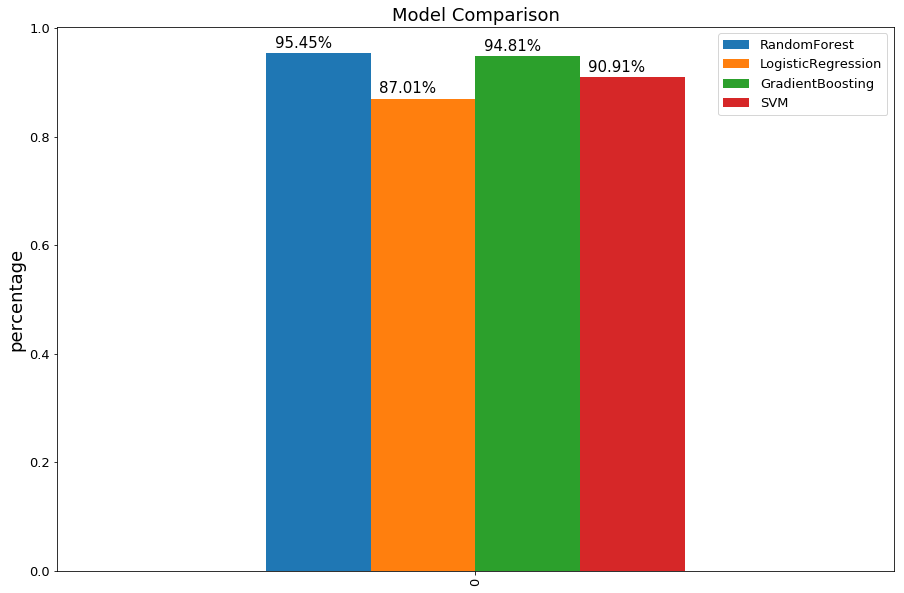

In [119]:
ax = modelCompare2.plot(kind='bar', figsize=(15,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Model Comparison", fontsize=18)
ax.set_ylabel("percentage", fontsize=18);
ax.legend(fontsize = 13)
ax.xticks = ['1','2','3','4']


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
#total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.01, i.get_height()+.01, \
            str(round((i.get_height())*100, 2))+'%', fontsize=15,
                color='black')

## We can clearly see that model accuracy of Logistic regression and SVM has increased significantly after one hot encoding. Before going for fine tuning of model, lets consider the other table which includes Activity of the user and see what we can do

In [120]:
df_activity = pd.read_csv("activity_record.csv")

In [121]:
df_activity.head()

,user_id,event,timestamp
0,79005,product_visit,2015-02-14 14:45:11.000000000
1,78397,account_verified,2015-02-02 08:32:11.000000000
2,78710,account_verified,2015-01-28 12:04:09.000000000
3,78312,signup,2015-01-13 15:53:40.000000000
4,78776,product_visit,2015-01-20 08:17:59.000000000


In [122]:
df_activity.sort_values(by = ['user_id','timestamp'], inplace = True)

## Lets sort the user_id and time stamp for integration with the other table

In [123]:
from datetime import datetime
 
year = lambda x: x 
df_activity['timestamp'] = df_activity['timestamp'].apply(lambda x:x[:-9])

#Lets take out some 0's from the end of seconds value

In [124]:
time = pd.to_datetime(df_activity['timestamp'],infer_datetime_format=True)
df_activity['time'] = time

In [125]:
df_activity.head(12)

,user_id,event,timestamp,time
327,78268,signup,2015-01-04 12:55:11.,2015-01-04 12:55:11
1726,78268,account_verified,2015-01-07 02:10:10.,2015-01-07 02:10:10
4894,78268,product_visit,2015-01-10 19:01:06.,2015-01-10 19:01:06
4875,78268,product_visit,2015-01-25 20:42:14.,2015-01-25 20:42:14
5055,78268,product_use,2015-01-25 21:19:27.,2015-01-25 21:19:27
2069,78269,signup,2015-01-18 04:20:05.,2015-01-18 04:20:05
238,78269,account_verified,2015-01-20 14:39:11.,2015-01-20 14:39:11
2459,78269,product_visit,2015-02-05 19:39:01.,2015-02-05 19:39:01
2389,78269,product_visit,2015-02-08 17:36:49.,2015-02-08 17:36:49
1462,78269,product_visit,2015-02-24 02:36:03.,2015-02-24 02:36:03


## To be honest I don't see what i can do from this data, I came up with an approach of getting the number of days taken by the user to visit the product from sign up and time taken to use the product from sign up lets see if that makes any difference

In [126]:
ids = df_user.index.values.tolist()

In [127]:
#df_times = pd.DataFrame(newtime, index=ids, columns=['signupToPV'])

In [128]:
# Converting the timedata to string for product Use
 
times1 = []
for i in ids:
    #print(i)
    if len(df_activity[(df_activity.user_id == i) & (df_activity.event == 'product_use')]['time']) >= 1:
        times1.append(abs((df_activity[(df_activity.user_id == i) & (df_activity.event == 'signup')]['time']).values - (df_activity[(df_activity.user_id == i) & (df_activity.event == 'product_use')]['time'])[:1]))
    else:
        times1.append(int(-1))
    

In [129]:
## Only taking number of days difference until using the product and considering -1 if not used

newtime = []
for j in range(len(times1)):
    #print(j)
    if len(str(times1[j])) == 2:
        newtime.append(int(-1))
    elif len(str(times1[j])) == 56:
        newtime.append(int(str(times1[j])[4:7]))
    else:
        newtime.append(int(str(times1[j])[7:9]))

In [130]:
df_times = pd.DataFrame(newtime, index=ids, columns=['signupToPV'])

In [131]:
df_times['signup-PU_Days'] = newtime

In [132]:
## Converting the timedata to string for product Visit
times1 = []
for i in ids:
    times1.append(abs((df_activity[(df_activity.user_id == i) & (df_activity.event == 'signup')]['time']).values - (df_activity[(df_activity.user_id == i) & (df_activity.event == 'product_visit')]['time'])[:1]))
    

In [133]:
# Only taking number of days difference and considering 0 if no difference
newtime = []
for j in range(len(times1)):
    #print(j)
    if len(str(times1[j])) == 50:
        newtime.append(int(0))
    elif len(str(times1[j])) == 55:
        newtime.append(int(str(times1[j])[5:7]))
    elif len(str(times1[j])) == 56:
        newtime.append(int(str(times1[j])[4:7]))
    elif len(str(times1[j])) == 54:
        newtime.append(int(str(times1[j])[4:6]))
    elif len(str(times1[j])) == 48 or len(str(times1[j])) == 49:
        newtime.append(int(str(times1[j])[:3]))
    else:
        newtime.append(int(str(times1[j])[7:9]))
    

In [134]:
df_times['signup-PV_Days'] = newtime

In [135]:
df_times.head(8)

,signupToPV,signup-PU_Days,signup-PV_Days
78268,21,21,6
78269,-1,-1,18
78271,33,33,1
78272,-1,-1,13
78274,59,59,9
78275,11,11,5
78277,16,16,8
78278,1,1,60


In [136]:
#df_times.to_csv('outTimesStart.csv')

In [137]:
df_activityTime = df_times

In [138]:
#df_activityTime.drop(['signup-PU_Days','signup-PV_Days'],axis = 1, inplace=True)

In [139]:
df_activityTime['days_To_ProductUse'] = df_times['signup-PU_Days']
df_activityTime['days_To_ProductVisit'] = df_times['signup-PV_Days']

In [140]:
df_activityTime.drop(['signup-PU_Days','signup-PV_Days', 'signupToPV'],axis = 1, inplace=True)

In [141]:
df_activityTime.to_csv("Finalref.csv")
df_activityTime.head(10)

,days_To_ProductUse,days_To_ProductVisit
78268,21,6
78269,-1,18
78271,33,1
78272,-1,13
78274,59,9
78275,11,5
78277,16,8
78278,1,60
78279,-1,3
78281,-1,13


## Lets put these columns in our df_user2 dataset and do some analysis

In [142]:
df_user2['days_To_ProductUse'] = df_activityTime['days_To_ProductUse']
df_user2['days_To_ProductVisit'] = df_activityTime['days_To_ProductVisit']


In [143]:
#df_user2.drop('Visit_To_Use',axis=1,inplace=True)

In [144]:
df_user2.to_csv("OutFinal.csv")


In [145]:
df_user2['churn'] = y.values
df_user['churn'] = y.values

In [146]:
df_user2.head()

,apm,income,height,reaction_time,age,kappa_ability,weight,amount,gregariousness,favorite_pizza_topping_BBQ Sauce,...,favorite_ice_cream_flavor_Orange Sherbert,favorite_ice_cream_flavor_Peach,favorite_ice_cream_flavor_Pistachio,favorite_ice_cream_flavor_Red Velvet,favorite_ice_cream_flavor_Rocky Road,favorite_ice_cream_flavor_Strawberry,favorite_ice_cream_flavor_Vanilla,days_To_ProductUse,days_To_ProductVisit,churn
user_id,,,,,,,,,,,,,,,,,,,,,
78268,171,104,177,295,52,3363,144,19,57,0,...,0,0,0,0,0,0,0,21,6,0
78269,218,96,178,305,33,1720,147,57,48,0,...,0,0,1,0,0,0,0,-1,18,0
78271,184,101,185,295,44,920,153,79,52,0,...,0,0,0,0,0,0,0,33,1,0
78272,210,100,180,311,34,1453,154,29,56,0,...,0,0,0,0,0,0,0,-1,13,0
78274,223,111,181,287,41,2219,159,2,47,0,...,0,0,0,0,0,0,0,59,9,1


In [147]:
df_user2[['days_To_ProductUse','days_To_ProductVisit']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
days_To_ProductUse,770.0,6.106494,13.793539,-1.0,-1.0,-1.0,8.0,81.0
days_To_ProductVisit,770.0,10.064935,21.625094,0.0,4.0,7.0,11.0,445.0


In [148]:
# We can clearly see some outliers but anyway lets continue to dig deeper

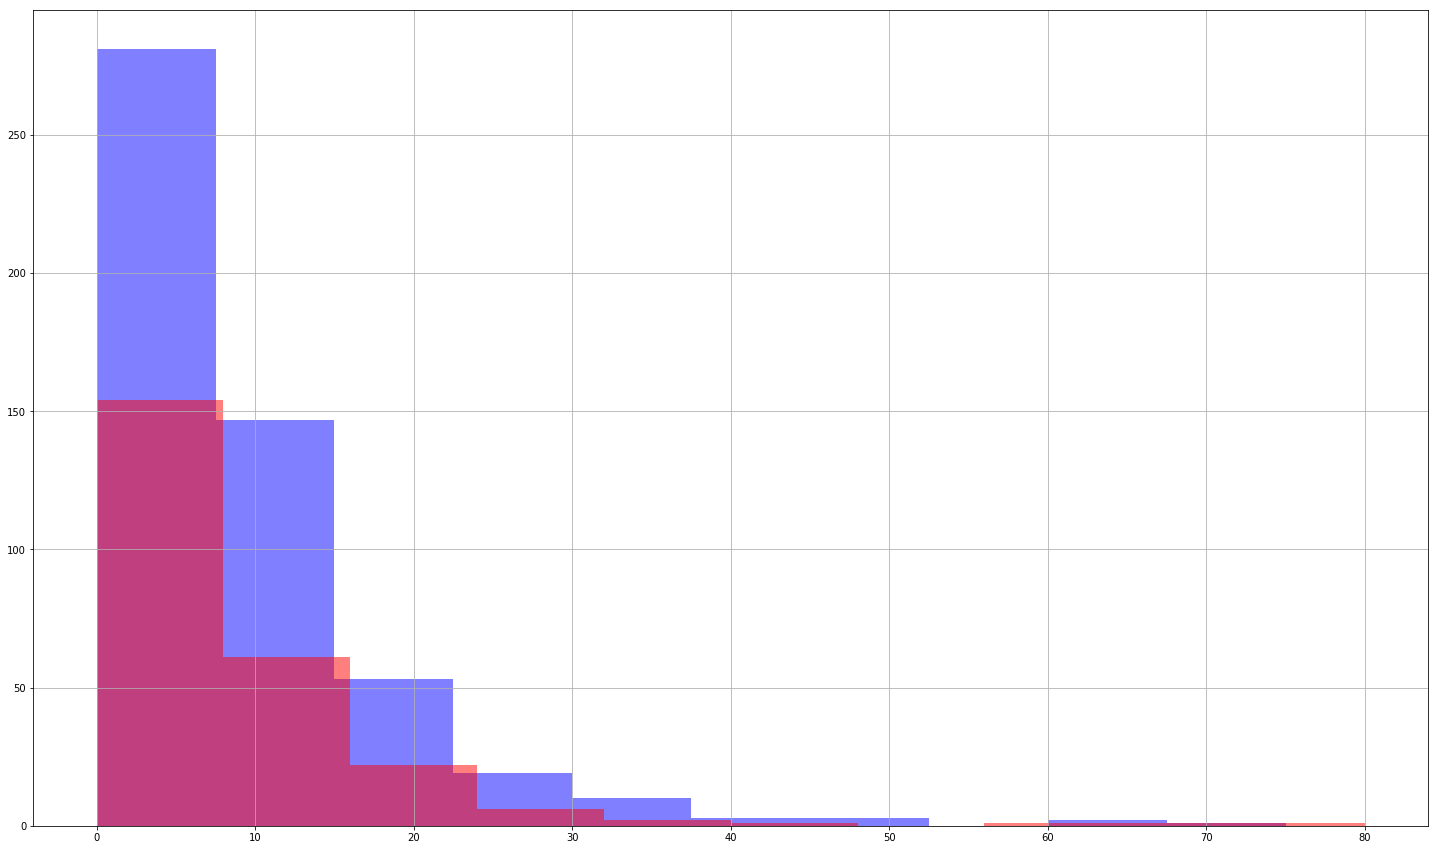

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(25, 15))


df_user2[(df_user2.churn == 0) & (df_user2['days_To_ProductVisit'] < 110 )]['days_To_ProductVisit'].hist( bins = 10, color="blue", alpha=0.5, ax=ax )
df_user2[(df_user2.churn == 1) & (df_user2['days_To_ProductVisit'] < 110 )]['days_To_ProductVisit'].hist(bins = 10, color="red", alpha=0.5, ax=ax)

In [150]:
print("percentage of people not churning who visit the product earlier than 15 days:",(df_user2[(df_user2['churn'] == 0) & (df_user2['days_To_ProductVisit'] < 15)]['days_To_ProductVisit'].value_counts().sum())/(df_user2[df_user2['days_To_ProductVisit']<15]['churn'].value_counts().sum())*100)

print("percentage of people churning who visit the product earlier than 15 days:",(df_user2[(df_user2['churn'] == 1) & (df_user2['days_To_ProductVisit'] < 15)]['days_To_ProductVisit'].value_counts().sum())/(df_user2[df_user2['days_To_ProductVisit']<15]['churn'].value_counts().sum())*100)

print("percentage of people not churning who visit the product later than 15 days:",(df_user2[(df_user2['churn'] == 0) & (df_user2['days_To_ProductVisit'] > 15)]['days_To_ProductVisit'].value_counts().sum())/(df_user2[df_user2['days_To_ProductVisit']>15]['churn'].value_counts().sum())*100)

print("percentage of people churning who visit the product later than 15 days:",(df_user2[(df_user2['churn'] == 1) & (df_user2['days_To_ProductVisit'] > 15)]['days_To_ProductVisit'].value_counts().sum())/(df_user2[df_user2['days_To_ProductVisit']>15]['churn'].value_counts().sum())*100)

percentage of people not churning who visit the product earlier than 15 days: 67.0846394984326
percentage of people churning who visit the product earlier than 15 days: 32.9153605015674
percentage of people not churning who visit the product later than 15 days: 68.75
percentage of people churning who visit the product later than 15 days: 31.25


In [151]:
print("percentage of people not churning who use the product early:",(df_user2[(df_user2['churn'] == 0) & (df_user2['days_To_ProductUse'] < 9)]['days_To_ProductUse'].value_counts().sum())/(df_user2[df_user2['days_To_ProductUse']<9]['churn'].value_counts().sum())*100)

print("percentage of people churning who use the product early:",(df_user2[(df_user2['churn'] == 1) & (df_user2['days_To_ProductUse'] < 9)]['days_To_ProductUse'].value_counts().sum())/(df_user2[df_user2['days_To_ProductUse']<9]['churn'].value_counts().sum())*100)

print("percentage of people not churning who use the product later than 9 days:",(df_user2[(df_user2['churn'] == 0) & (df_user2['days_To_ProductUse'] > 9)]['days_To_ProductUse'].value_counts().sum())/(df_user2[df_user2['days_To_ProductUse']>9]['churn'].value_counts().sum())*100)

print("percentage of people churning who use the product later than 9 days:",(df_user2[(df_user2['churn'] == 1) & (df_user2['days_To_ProductUse'] > 9)]['days_To_ProductUse'].value_counts().sum())/(df_user2[df_user2['days_To_ProductUse']>9]['churn'].value_counts().sum())*100)

percentage of people not churning who use the product early: 68.46543001686341
percentage of people churning who use the product early: 31.534569983136596
percentage of people not churning who use the product later than 9 days: 63.74999999999999
percentage of people churning who use the product later than 9 days: 36.25


In [152]:
print("People who visit early and do not see the product are",(df_user2[(df_user2.days_To_ProductVisit < 15) & (df_user2.days_To_ProductUse == -1)]['churn'].value_counts()[0])/(df_user2[(df_user2.days_To_ProductVisit < 15) & (df_user2.days_To_ProductUse == -1)]['churn'].value_counts().sum())*100,"% likely not to churn","\n")
print("People who visit late and do not see the product are",(df_user2[(df_user2.days_To_ProductVisit > 15) & (df_user2.days_To_ProductUse == -1)]['churn'].value_counts()[0])/(df_user2[(df_user2.days_To_ProductVisit > 15) & (df_user2.days_To_ProductUse == -1)]['churn'].value_counts().sum())*100,"% likely not to churn")


People who visit early and do not see the product are 67.66169154228857 % likely not to churn 

People who visit late and do not see the product are 68.18181818181817 % likely not to churn


In [153]:
#df_user2.drop('PVdays',axis = 1, inplace=True)
df_user2.head()

,apm,income,height,reaction_time,age,kappa_ability,weight,amount,gregariousness,favorite_pizza_topping_BBQ Sauce,...,favorite_ice_cream_flavor_Orange Sherbert,favorite_ice_cream_flavor_Peach,favorite_ice_cream_flavor_Pistachio,favorite_ice_cream_flavor_Red Velvet,favorite_ice_cream_flavor_Rocky Road,favorite_ice_cream_flavor_Strawberry,favorite_ice_cream_flavor_Vanilla,days_To_ProductUse,days_To_ProductVisit,churn
user_id,,,,,,,,,,,,,,,,,,,,,
78268,171,104,177,295,52,3363,144,19,57,0,...,0,0,0,0,0,0,0,21,6,0
78269,218,96,178,305,33,1720,147,57,48,0,...,0,0,1,0,0,0,0,-1,18,0
78271,184,101,185,295,44,920,153,79,52,0,...,0,0,0,0,0,0,0,33,1,0
78272,210,100,180,311,34,1453,154,29,56,0,...,0,0,0,0,0,0,0,-1,13,0
78274,223,111,181,287,41,2219,159,2,47,0,...,0,0,0,0,0,0,0,59,9,1


## Modelling with two columns related to number of days

In [154]:
I = df_user2.copy(deep = True)

In [155]:
j = I.iloc[:,-1]

In [156]:
I = I.iloc[:,:-1]

In [157]:
I_train,I_test,j_train,j_test = train_test_split(I,j, test_size = 0.2, random_state = 101)

In [158]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(I_train, j_train)

C:\Users\13154\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [159]:
predict = model.predict(I_test)

In [160]:
print(metrics.accuracy_score(j_test,predict))

0.8636363636363636


## slight increase in Accuracy but not much Difference

In [161]:
weights = pd.Series(model.coef_[0],index=I.columns.values)
weights.sort_values(ascending = False,inplace = True)
weights

favorite_ice_cream_flavor_Pistachio            1.553151
favorite_pizza_topping_BBQ Sauce               1.380840
favorite_pizza_topping_Pesto                   1.136731
favorite_ice_cream_flavor_Black Cherry         1.068387
favorite_ice_cream_flavor_Cheesecake           0.971853
city_B-ville                                   0.930206
favorite_pizza_topping_Black olives            0.775334
grade_X                                        0.767302
favorite_pizza_topping_Pepperoni               0.752732
favorite_pizza_topping_Spinach                 0.541344
favorite_ice_cream_flavor_Cookies and Cream    0.534897
favorite_pizza_topping_Chicken                 0.521428
favorite_ice_cream_flavor_Chocolate            0.470306
favorite_ice_cream_flavor_Rocky Road           0.389290
favorite_pizza_topping_Salami                  0.314085
favorite_pizza_topping_Pineapple               0.295586
favorite_pizza_topping_Garlic                  0.273047
favorite_pizza_topping_Tomato                  0

In [162]:
new_cols1 = weights.index.values[:19]
new_cols1 = new_cols1.tolist()


In [163]:
len(new_cols1)

19

In [164]:
new_cols1.extend(weights.index.values[-19:])
#new_cols1.append(['income','churn'])
len(new_cols1)

38

## Lets try selecting top 15 and botton 15 based on weights assigned by Logistic regression which match our analysis and model it

In [165]:
sample = I.copy(True)

In [166]:
for ind in I.columns.tolist():
    if ind not in new_cols1:
        I.drop(ind, axis = 1, inplace=True)

In [167]:
I_train,I_test,j_train,j_test = train_test_split(I,j, test_size = 0.2, random_state = 101)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(I_train, j_train)

predict = model.predict(I_test)

print(metrics.accuracy_score(j_test,predict))



0.8376623376623377


C:\Users\13154\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [168]:
weights = pd.Series(model.coef_[0],index=I.columns.values)
weights.sort_values(ascending = False)

favorite_ice_cream_flavor_Pistachio            1.619185
favorite_pizza_topping_BBQ Sauce               1.386045
favorite_pizza_topping_Pesto                   1.328758
favorite_pizza_topping_Pepperoni               1.029291
favorite_ice_cream_flavor_Black Cherry         0.999671
favorite_pizza_topping_Black olives            0.919873
favorite_ice_cream_flavor_Cheesecake           0.897496
favorite_pizza_topping_Garlic                  0.709854
favorite_pizza_topping_Spinach                 0.673829
favorite_pizza_topping_Chicken                 0.383630
favorite_pizza_topping_Tomato                  0.373354
favorite_ice_cream_flavor_Cookies and Cream    0.211892
city_B-ville                                   0.159870
favorite_pizza_topping_Pineapple               0.154467
favorite_ice_cream_flavor_Rocky Road           0.147885
favorite_ice_cream_flavor_Chocolate            0.077266
income                                         0.074711
favorite_pizza_topping_Salami                  0

In [169]:
from sklearn.ensemble import RandomForestClassifier #use RandomForestRegressor for regression problem
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
modelRandom2= RandomForestClassifier(n_estimators=1000,n_jobs=-1,verbose=1)
# Train the model using the training sets and check score
modelRandom2.fit(I_train, j_train)
modelRandom2.score(I_train, j_train)
#Predict Output
predicted12= modelRandom2.predict(I_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


In [170]:
print(metrics.accuracy_score(j_test, predicted12))

0.9545454545454546


In [171]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=5,verbose=1)
modelGB2.fit(I_train, j_train)

      Iter       Train Loss   Remaining Time 
         1           0.4351            2.74s
         2           0.2834            2.39s
         3           0.2182            2.57s
         4           0.1615            2.17s
         5           0.1328            2.33s
         6           0.0881            2.44s
         7           0.0769            2.37s
         8           0.0804            2.44s
         9           0.0543            2.39s
        10           0.3504            2.44s
        20           0.3251            2.09s
        30           0.3201            1.96s
        40           0.3187            1.92s
        50           0.3182            1.86s
        60           0.3181            1.69s
        70           0.3181            1.54s
        80           0.3181            1.43s
        90           0.3181            1.31s
       100           0.3181            1.24s
       200           0.3181            0.81s
       300           0.3181            0.61s
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [172]:
predictedGB = modelGB2.predict(I_test)
print(metrics.accuracy_score(j_test, predictedGB))

0.9415584415584416


## as we can see ice cream and pizza preference are making a lot of difference, What if its just a formal survey question and nothing do with companies product and service, 
## Lets drop ice cream and pizza toppings and check what is the churn prediction

In [173]:
df_NF = df_user.copy(True)
df_NF.drop(['favorite_ice_cream_flavor', 'favorite_pizza_topping', 'height', 'weight', 'kappa_ability'], axis = 1, inplace=True)

In [174]:
df_NF = pd.concat([df_NF, pd.get_dummies(df_NF.company,prefix = 'Company')], axis=1)
df_NF = pd.concat([df_NF, pd.get_dummies(df_NF.city,prefix = 'City')], axis=1)
df_NF = pd.concat([df_NF, pd.get_dummies(df_NF.grade,prefix = 'grade')],axis=1)
#df_user2 = pd.concat([df_user2, pd.get_dummies(df_user.favorite_ice_cream_flavor)], axis=1)
df_NF.drop(['grade','city','company'],axis = 1, inplace=True)

In [175]:
df_NF.head()

,apm,income,reaction_time,age,amount,gregariousness,churn,Company_0,Company_1,Company_2,City_0,City_1,City_2,grade_0,grade_1,grade_2
user_id,,,,,,,,,,,,,,,,
78268,171,104,295,52,19,57,0,0,1,0,0,0,1,1,0,0
78269,218,96,305,33,57,48,0,0,1,0,0,0,1,0,1,0
78271,184,101,295,44,79,52,0,0,1,0,1,0,0,0,0,1
78272,210,100,311,34,29,56,0,1,0,0,1,0,0,0,0,1
78274,223,111,287,41,2,47,1,1,0,0,0,1,0,0,1,0


In [176]:
L = df_NF.copy(True)
L.drop("churn",axis=1,inplace=True)
M = j

In [177]:
L_train,L_test,M_train,M_test = train_test_split(L,M, test_size = 0.2, random_state = 101)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(L_train, M_train)

predict = model.predict(L_test)

print(metrics.accuracy_score(M_test,predict))



0.7857142857142857


C:\Users\13154\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## When we do not consider the Ice cream or pizza preference, We get an accuracy of around 78, Which can be improved in future works, which will be discussed 

In [182]:
weights = pd.Series(model.coef_[0],index=L.columns.values)
weights.sort_values(ascending = False)

City_1            0.501497
grade_0           0.370454
income            0.178345
amount            0.008765
reaction_time    -0.002433
age              -0.018349
apm              -0.039466
gregariousness   -0.066952
Company_1        -0.563574
Company_2        -0.707898
grade_1          -1.437305
City_0           -1.666031
Company_0        -1.965262
City_2           -2.072200
grade_2          -2.169883
dtype: float64

In [183]:
from sklearn.ensemble import RandomForestClassifier #use RandomForestRegressor for regression problem
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
modelRandom2= RandomForestClassifier(n_estimators=1000,n_jobs=-1,verbose=1)
# Train the model using the training sets and check score
modelRandom2.fit(L_train, M_train)
modelRandom2.score(L_train, M_train)
#Predict Output
predicted12= modelRandom2.predict(L_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


In [184]:
print(metrics.accuracy_score(M_test, predicted12))

0.935064935064935


## The prediction considerably decreases, However prediction model can be finetuned by using crossvalidation and scaling of data , giving more data, and also increasing trees and decreasing depth